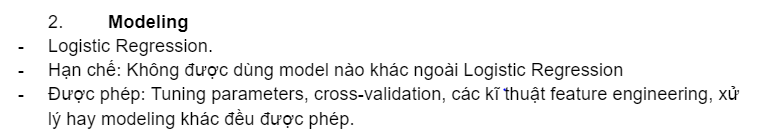

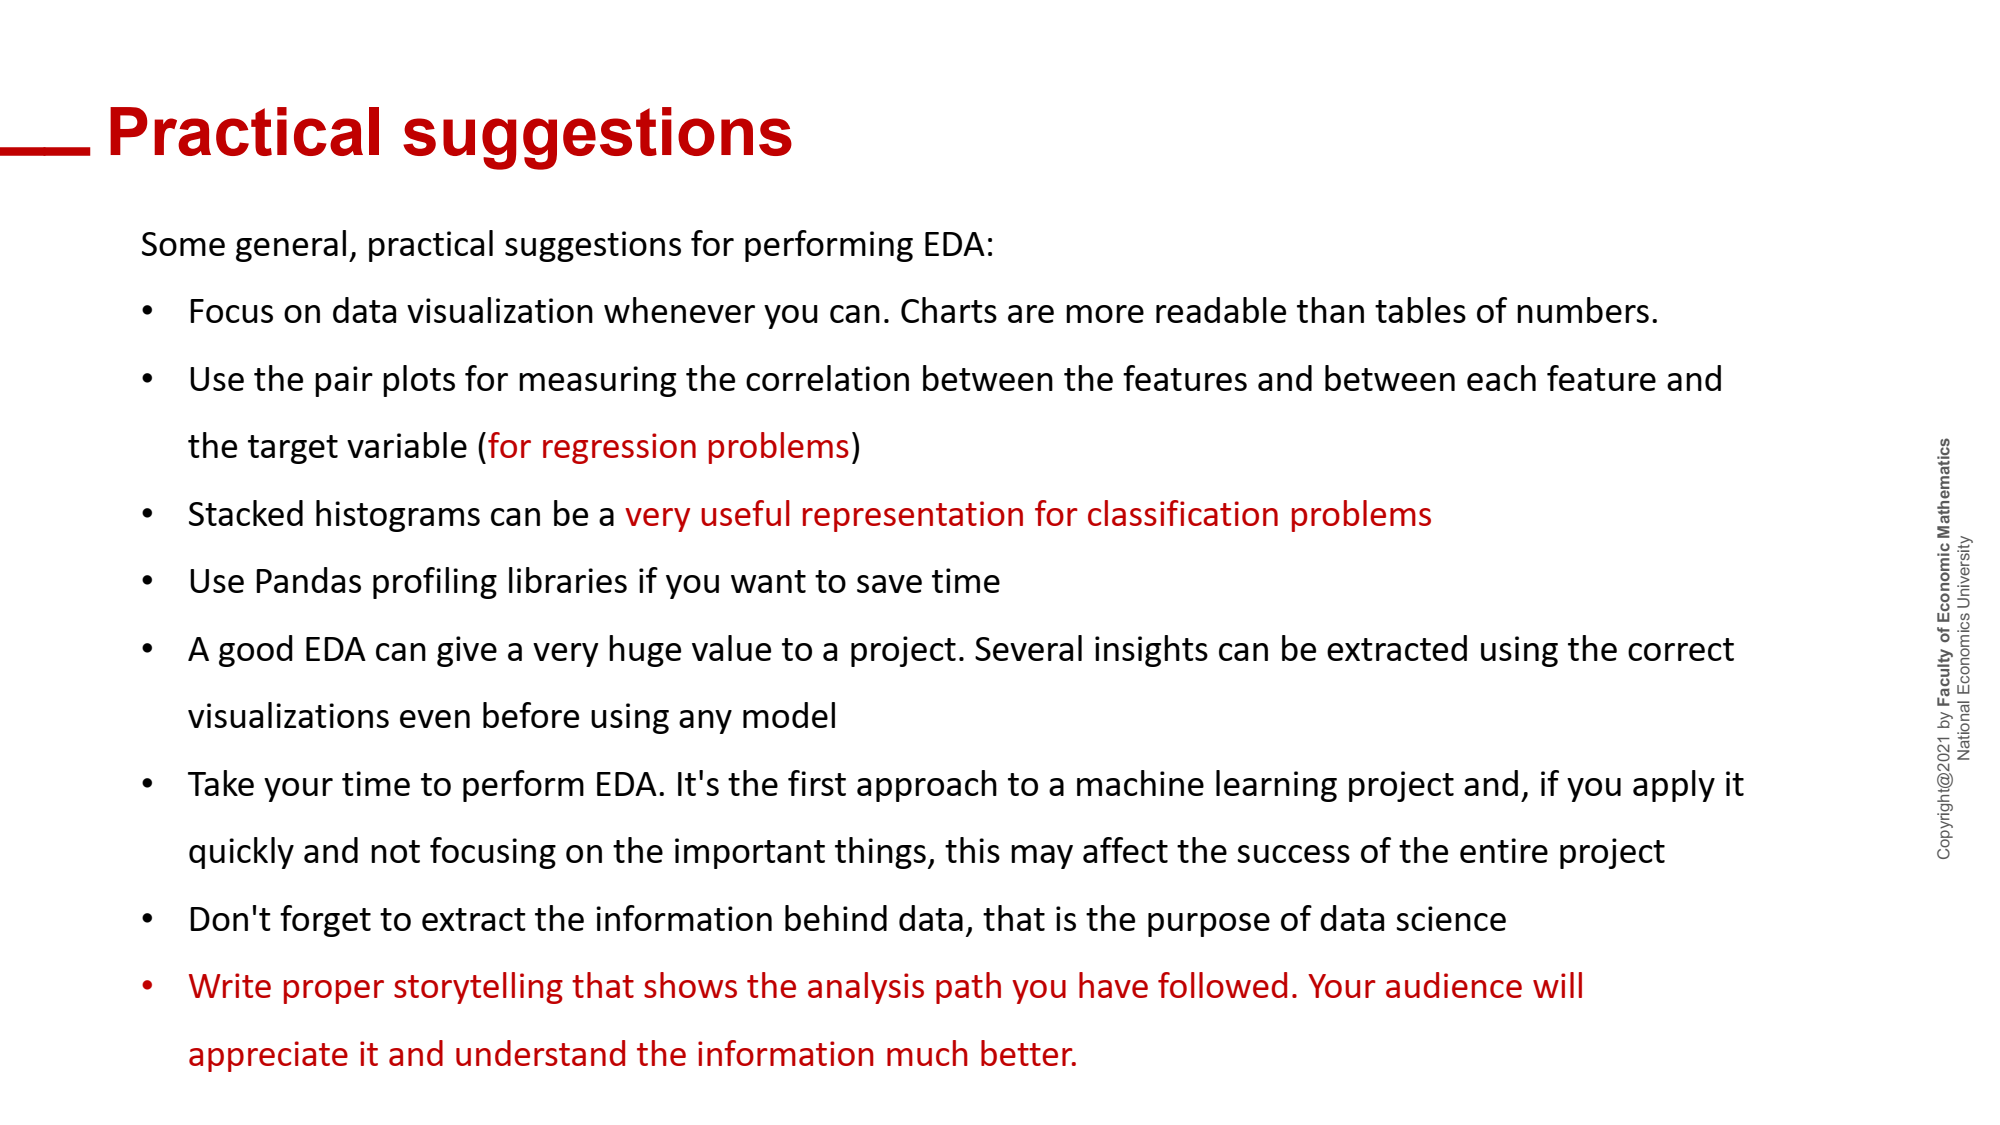

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file = ['dseb63_application_test','dseb63_application_train','dseb63_bureau',\
        'dseb63_bureau_balance', 'dseb63_credit_card_balance','dseb63_installments_payments',\
        'dseb63_POS_CASH_balance','dseb63_previous_application']
link = 'D:\\Năm 3 - HK1\\Visualize\\Ex\\final_project\\dseb63_final_project_DP_dataset\\dseb63_final_project_DP_dataset\\'
df = pd.read_csv(link + file[1]+'.csv',index_col='Unnamed: 0')

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

# Percentage Null values of each column

In [4]:
corr = pd.DataFrame(df.corr()).fillna(0)

def visual_corr(df, feature,n,ax):
    pos = df.loc[feature].sort_values()[-(n+1):-1]
    neg = df.loc[feature].sort_values()[:n]
    t = df.loc['TARGET',feature]
                   
    new = pd.concat((pos,neg))
    new.loc['TARGET'] = t
    new = new.sort_values(ascending=False)
    # f, ax = plt.subplots(figsize=(8,5))
    sns.barplot(new.squeeze() ,orient='h',ax = ax,alpha=0.3,width=0.5)

    ax.spines[['top','bottom']].set_visible(False)
    ax.spines[['left','right']].set_color('grey')
    ax.xaxis.tick_top()
    ax.tick_params(left = False,top = False)
    ax.set_xticklabels('')
    l= ax.get_xlim()[1] - ax.get_xlim()[0]

    for p in ax.patches:
        x,y = p.get_xy()
        width = p.get_width()
        # height = p.get_height()
        if width <= 0:
            ax.annotate(xy = (x+l/30 , y+0.4 ), text = str(int(width*100))+'%')
        else:
            ax.annotate(xy = (x-l/16 , y+0.4 ), text = str(int(width*100))+'%')
    sns.barplot(new.tail(n).squeeze() ,orient='h',ax = ax,color ='red',alpha=0.3,width=0.5)
    sns.barplot(data = {'TARGET': t} ,orient='h',ax = ax,color ='lightgreen',alpha=1,width=0.5,\
                edgecolor= 'green')
    
    for i in range(len(new)):
        if new.index[i] == 'TARGET':
            ax.axhline(y=i,linewidth=25, color = 'grey', alpha = 0.2)
            if t <= 0:
                ax.text(x= l/10, y =i+0.14, s = feature + ' correlate with TARGET')
            else:
                ax.text(x= t+l/10, y =i+0.14, s = feature + ' correlate with TARGET')

    # ax.set_yticklabels(list(new.index), fontdict = {'horizontalalignment': 'left'})
    # ax.axvline(ax.get_xlim()[1]+l/30,color = 'grey',alpha = 0.2)
    ax.set_xlim(ax.get_xlim()[0]-l/24,ax.get_xlim()[1])
    # for i in range(len(new)):
        # ax.yaxis.get_majorticklabels()[i].set_x(0.7)
    ax.set_xlabel('')
    yticklabel = list(map(lambda x: x.replace('TARGET', ''), list(new.index)))
    ax.set_yticklabels(yticklabel)
    # print(xticklabel)

In [5]:
def fence(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    upper = q3 + 1.5*(q3-q1)
    lower = q1 - 1.5*(q3-q1)
    return lower, upper
def num_visual(df,feature, kde = False):
    """Visualize numeric, continuous feature"""
    f, ax = plt.subplots(2,3,figsize =(16,8)) #gridspec_kw={'width_ratios':[1,2,2,2]}
    # calculate upper and lower fence 
    l,u = fence(df, feature)

    # closer look in to quartile, skewness, kurtosis, median, outliner
    # distribution of feature
    v0 = df[(df[feature]<u) & (df[feature]>l)][feature]
    v1 = df[(df['TARGET']==1) & (df[feature]<u) & (df[feature]>l)][feature]
    v2 = df[(df['TARGET']==0) & (df[feature]<u) & (df[feature]>l)][feature]
    if df[feature].nunique()>10:
        if u!= l:
            if kde == False:
                ax[0][0].hist(v0)
            # cross_tabulation with Target variable
                ax[0][1].hist(v1,color ='red',alpha = 0.3,)
                ax[0][2].hist(v2,color ='green',alpha = 0.4)
            else:
                sns.histplot(v0,ax = ax[0][0],kde = True,bins=15,edgecolor ='white')    
            # cross_tabulation with Target variable
                sns.histplot(v1, color ='red',alpha = 0.3,ax = ax[0][1],kde = True,bins=15,edgecolor ='white') 
                sns.histplot(v2, color ='green',alpha = 0.4,ax = ax[0][2],kde = True,bins=15,edgecolor ='white') 
        else:
            ax[0][0].hist(df[feature],edgecolor ='white')
            # # cross_tabulation with Target variable
            ax[0][1].hist(df[(df['TARGET']==1)][feature],color ='red',alpha = 0.3,edgecolor ='white')
            ax[0][2].hist(df[(df['TARGET']==0)][feature],color ='green',alpha = 0.4,edgecolor ='white') 

    else:
        ax[0][0].bar(df[feature].value_counts().index,df[feature].value_counts().values,\
                     tick_label = df[feature].value_counts().index)

        ax[0][1].bar(df[(df['TARGET']==1)][feature].value_counts().index,\
                     df[(df['TARGET']==1)][feature].value_counts().values,color ='red',alpha = 0.3,\
                        tick_label = df[(df['TARGET']==1)][feature].value_counts().index)
        
        ax[0][2].bar(df[(df['TARGET']==0)][feature].value_counts().index,\
                     df[(df['TARGET']==0)][feature].value_counts().values,color ='green',alpha = 0.4,\
                     tick_label = df[(df['TARGET']==0)][feature].value_counts().index)

    ax[0][1].set_xlim(ax[0][0].get_xlim())
    ax[0][2].set_xlim(ax[0][0].get_xlim())


    # beautify
    ax[0][0].set_ylabel(feature+'\n'+'_'*35+'\n\n',fontweight = 'bold',fontsize=12)
    for i in range(3):
            ax[0][i].spines[['top','bottom','left','right']].set_color('grey')
            ax[0][i].tick_params(left=False, bottom = False)
            ax[0][i].grid(axis = 'y')
            ax[0][i].set_xlabel('')

    gs = plt.GridSpec(2,12,wspace = 0.3)
    for ax in ax[1,:]:
        ax.remove()
    axnew = f.add_subplot(gs[1,5:11])
    visual_corr(corr ,feature,5,axnew)
    axnew2 = f.add_subplot(gs[1,1:3])
    sns.boxplot(df[feature],ax=axnew2)
    axnew2.spines[['top','bottom','left','right']].set_color('grey')
    axnew2.tick_params(left=False, bottom = False)
    axnew2.set_ylabel('')
    f.tight_layout(h_pad=3)



In [6]:
def cat_visual2(df,feature):
    f, ax = plt.subplots(1,3,figsize = (5*3,4),gridspec_kw={'width_ratios':[1.5,2,2]})
    #1
    sns.barplot(df[feature].value_counts(dropna=False),orient='h',ax=ax[0],palette='Set2',width = 0.5)
    ax[0].spines[['top','bottom','left','right']].set_visible(False)
    ax[0].tick_params(left=False)
    ax[0].xaxis.tick_top() 
    ax[0].set_xlabel('')
    #2
    ax[1].pie(x=df[df['TARGET']==1][feature].value_counts(dropna=False),\
    labels=df[df['TARGET']==1][feature].value_counts(dropna=False).index,\
    startangle=90,autopct='%.2f%%') 
    #3
    ax[2].pie(x=df[df['TARGET']==0][feature].value_counts(dropna=False),\
    labels=df[df['TARGET']==0][feature].value_counts(dropna=False).index,\
    startangle=90,autopct='%.2f%%') 
    
    #beautify
    ax[0].set_ylabel(feature+'\n'+'_'*30+'\n\n',fontweight = 'bold',fontsize=12)

    plt.tight_layout(w_pad=2,h_pad=2)

def cat_visual(df,feature):
    if df[feature].nunique() < 3:
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()*2.5))
    elif df[feature].nunique() < 5:
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()*1.8))
    elif df[feature].nunique() < 20 :
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()/1.2))
    else:
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()/1.6))
    gs = plt.GridSpec(2,3)
    f.delaxes(ax[1][1])
    f.delaxes(ax[1][0])
    axnew = f.add_subplot(gs[:,0])
    axnew2 = f.add_subplot(gs[:,1])
    f.delaxes(ax[0][1])
    f.delaxes(ax[0][0])

    #1
    ord = df[[feature,'TARGET']].value_counts(normalize=True).unstack().fillna(0)
    ord['order'] = ord.sum(axis = 1)
    ord.sort_values('order',ascending = False,inplace=True)
    hue_order = ord.index.tolist()
    ord.drop('order',axis= 1,inplace=True)
    sns.heatmap(ord, annot = True, cmap = 'Greens',fmt = '.2f',ax =axnew,cbar = False)
    

# Create heatmap
    axnew.set_yticklabels(axnew.get_yticklabels(),rotation =360,horizontalalignment =  'center',fontweight='bold')
    axnew.tick_params(bottom = False, left = False,right = False)
    axnew.xaxis.tick_top() 
    axnew.yaxis.tick_right()
    axnew.tick_params(bottom = False, left = False,right = False)
    l,u = (axnew.get_xlim())
    axnew.set_xlim(l,u+(u-l)/2)
    axnew.set_ylabel('')
    axnew.set_xlabel('')

    #2
    sns.barplot(df[feature].value_counts(),\
                orient='h',ax=axnew2,width = 0.5,alpha=0.8)   
    sns.barplot(df[df['TARGET']==0][feature].value_counts(),\
                orient='h',ax=axnew2,color= 'red',width = 0.5,alpha = 0.8)
    axnew2.spines[['top','bottom','left','right']].set_visible(False)
    axnew2.xaxis.tick_top() 
    axnew2.tick_params(left=False, bottom = False,top = False)

    axnew2.grid(axis = 'x')
    axnew2.set_xlabel('')
    axnew2.set_yticklabels('')

    #3
    sns.countplot(data= df[df['TARGET']==1], x ='TARGET', hue = feature ,ax= ax[0][2],\
                  stat = 'percent',palette='Set3',edgecolor = 'white',hue_order=hue_order,legend=False)
    sns.countplot(data= df[df['TARGET']==0], x ='TARGET', hue = feature ,ax= ax[1][2],\
                  stat = 'percent',palette='Set3',edgecolor = 'white',hue_order=hue_order,legend=False)
    
    ax[0][2].legend(hue_order,loc = 'upper right')

    for i in range(2):
        ax[i][2].spines[['top','bottom','left','right']].set_color('grey')
        ax[i][2].tick_params(left=False, bottom = False,top = False)
        ax[i][2].set_xlabel('')
 
    #beautify
    axnew.set_ylabel(feature+'\n'+'_'*30+'\n\n',fontweight = 'bold',fontsize=12)
    plt.tight_layout(w_pad=2)

Text(0.4, 1.04, 'Top 60 feature with highest percentage null values')

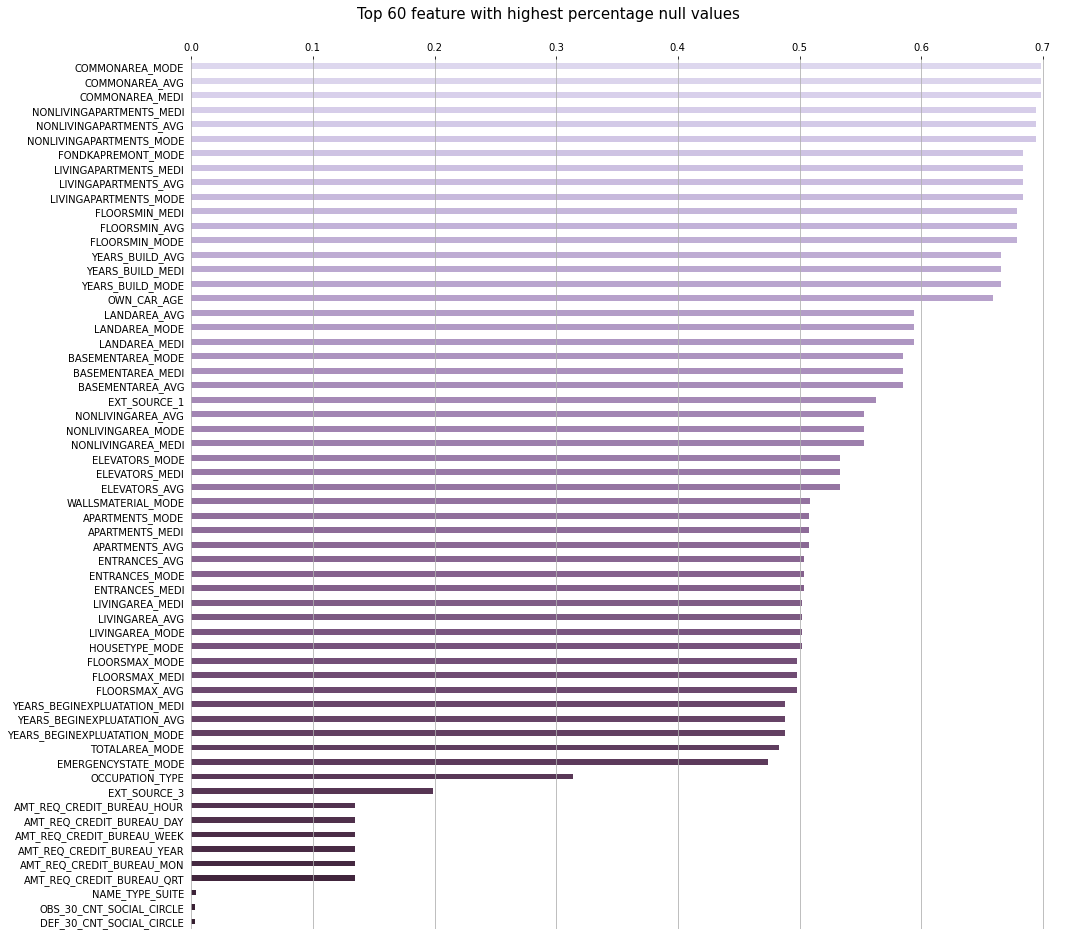

In [7]:
f, ax = plt.subplots(figsize=(16,16))
sns.barplot((df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(60),\
           orient='h',width=0.4,palette='ch:s=.6,r=-.2',)
ax.spines[['right','top','bottom','left']].set_visible(False)
ax.tick_params(left=False)
ax.xaxis.tick_top() 
ax.grid(axis='x')
ax.set_title('Top 60 feature with highest percentage null values',size=15,y=1.04,x=0.4)

In [8]:
# df.describe()

In [9]:
df.describe(include=["object", "category"])
for col in df.select_dtypes(include=['object','category']).columns:
    print(col, ":",df[col].nunique(),'\n' ,df[col].unique())    

NAME_CONTRACT_TYPE : 2 
 ['Cash loans' 'Revolving loans']
CODE_GENDER : 3 
 ['F' 'M' 'XNA']
FLAG_OWN_CAR : 2 
 ['N' 'Y']
FLAG_OWN_REALTY : 2 
 ['N' 'Y']
NAME_TYPE_SUITE : 7 
 ['Family' 'Unaccompanied' 'Spouse, partner' 'Children' 'Other_A' nan
 'Group of people' 'Other_B']
NAME_INCOME_TYPE : 8 
 ['State servant' 'Working' 'Pensioner' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE : 5 
 ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : 6 
 ['Married' 'Civil marriage' 'Single / not married' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE : 6 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE : 18 
 ['Core staff' 'Laborers' 'Managers' nan 'Drivers' 'Sales staff'
 'Cleaning staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'Accountants' 'Cooking staff' 'High 

In [10]:
# fig, ax = plt.subplots()
# ax.pie(df["TARGET"].value_counts(normalize= True), autopct='%1.1f%%', startangle=90, labels = ['0: Không trả được nợ','1: Trả được nợ'])
# plt.title('Target values',fontsize=25)
# plt.show()

Text(0.5, 1.0, 'Percentage of clients provide these document')

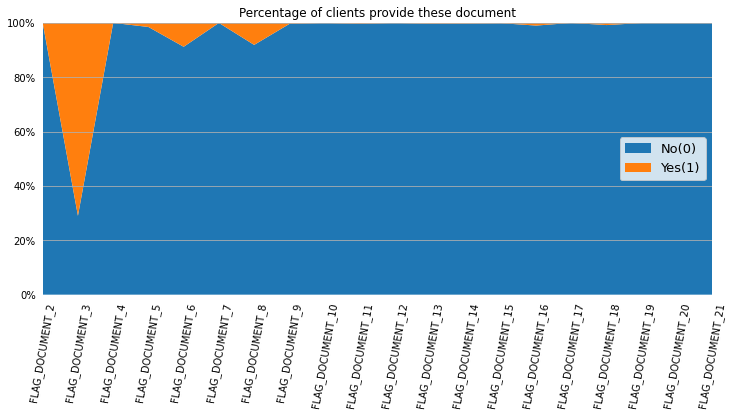

In [11]:
starting_idx = df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = df.columns.get_loc("FLAG_DOCUMENT_21")+1
a = pd.DataFrame()
for i in range(starting_idx,ending_idx):
    a[df.columns[i]] = df.iloc[:,i].value_counts(normalize=True)
f, ax = plt.subplots(figsize=(12,5))
ax.stackplot(a.columns, a.iloc[0],a.iloc[1])
ax.set_xticklabels(a.columns,rotation=80)
ax.spines[['top','bottom','right','left']].set_visible(False)
ax.set_xlim(0,19)
ax.set_ylim(0,1)
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
ax.tick_params(left=False,bottom=False)
ax.grid(axis='y')
ax.legend(['No(0)','Yes(1)'],fontsize=13,loc = 'center right')
ax.set_title('Percentage of clients provide these document')


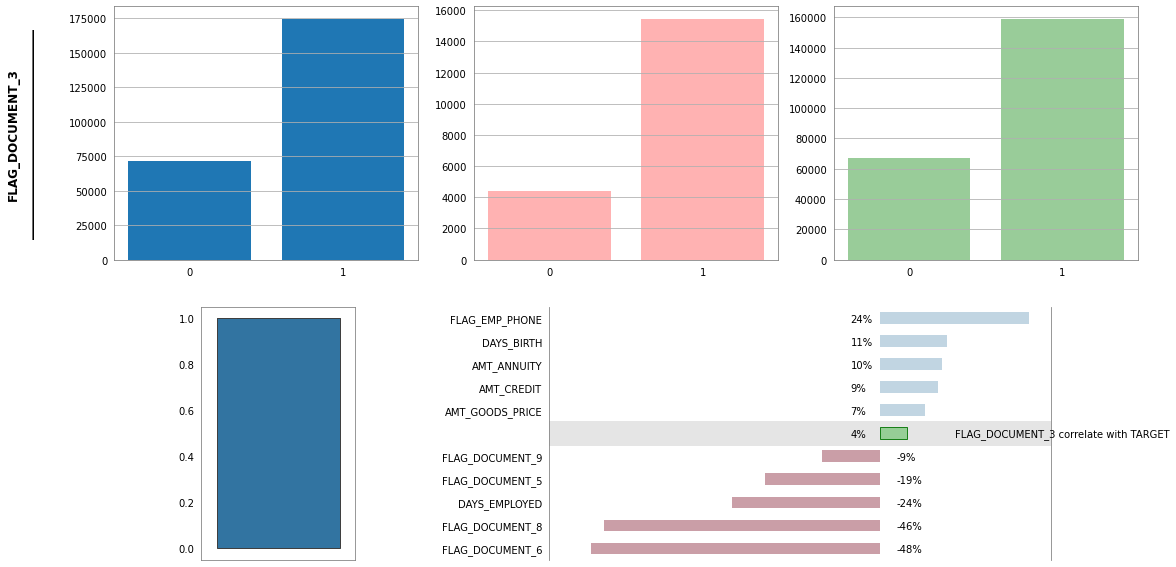

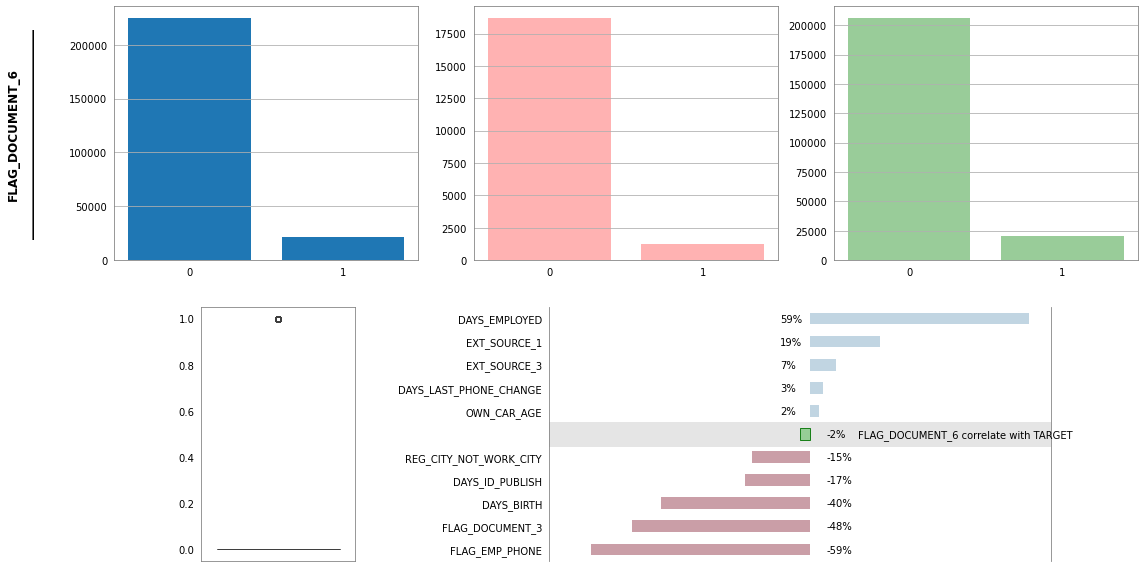

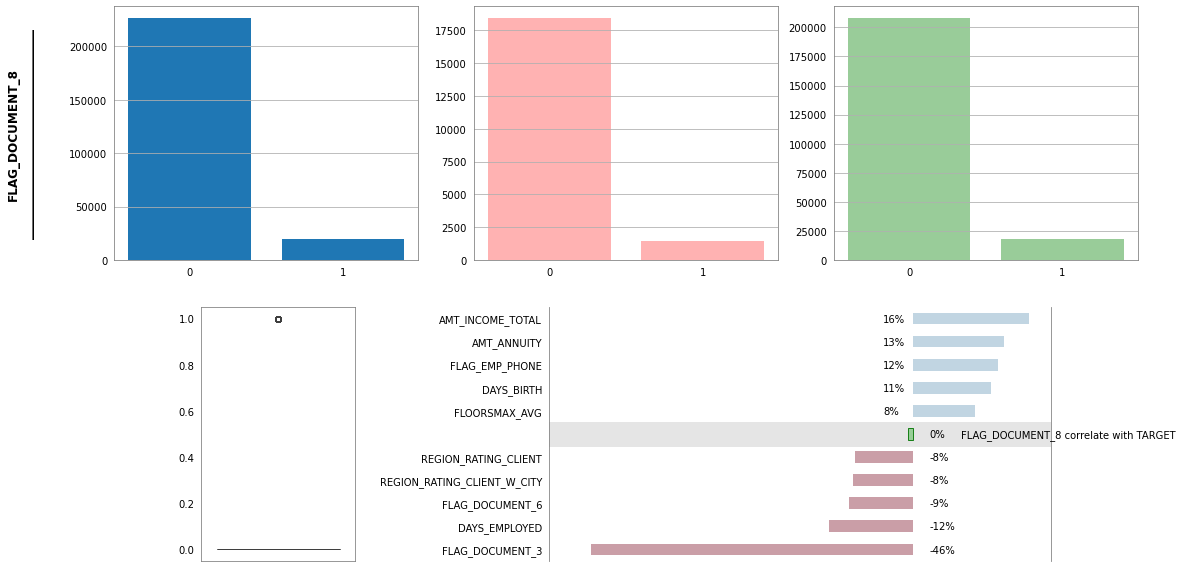

In [12]:
doc = ["FLAG_DOCUMENT_3","FLAG_DOCUMENT_6","FLAG_DOCUMENT_8"]
for col in doc:
    num_visual(df,col)

+ Most people do not have the documents except DOCUMENT_3, which cause data imbalance if we bring into model, so we drop all these and keep DOCUMENT_3 when its have high correl with Target and we can prevent its multicollinearity with DOC_6 and DOC_8.

# Social circle

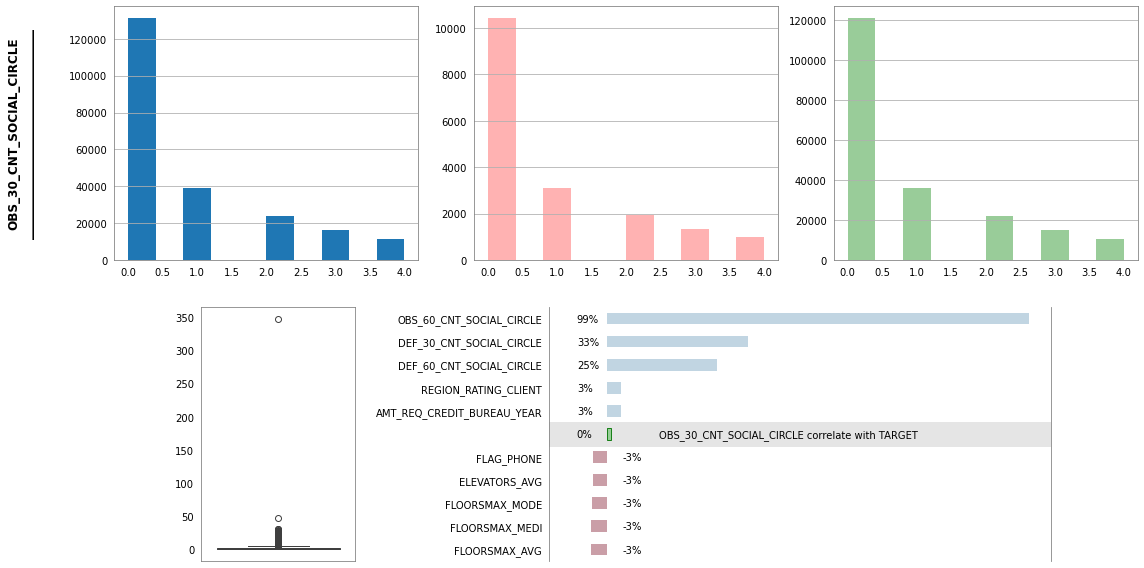

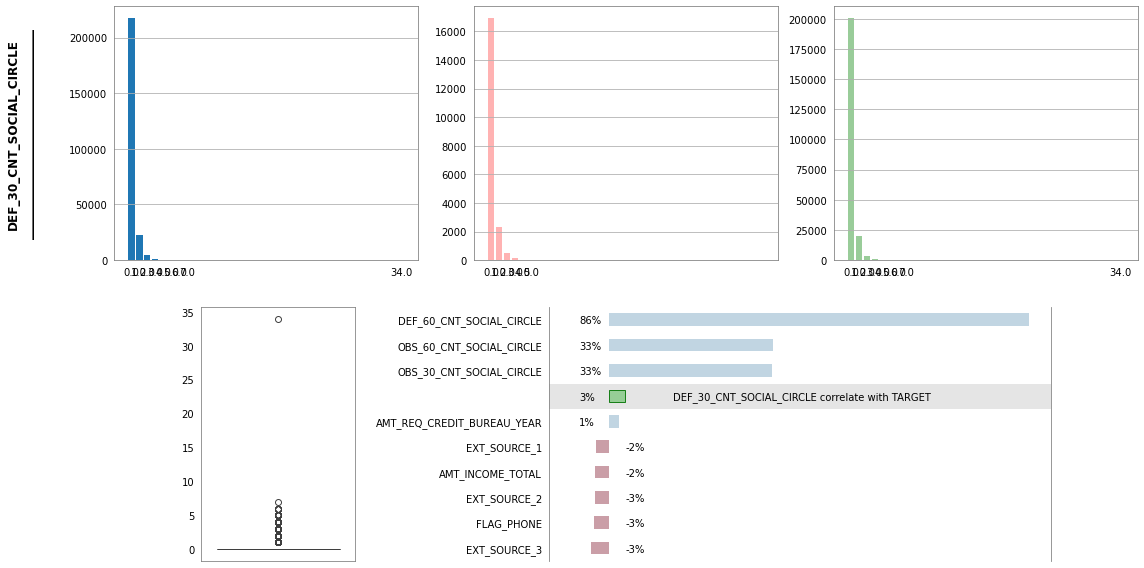

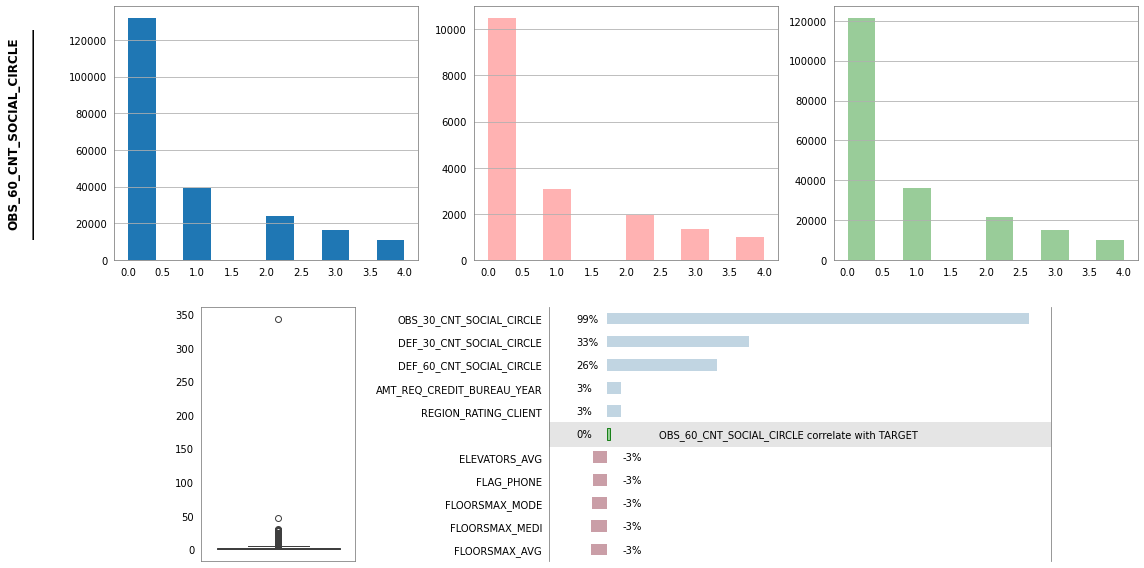

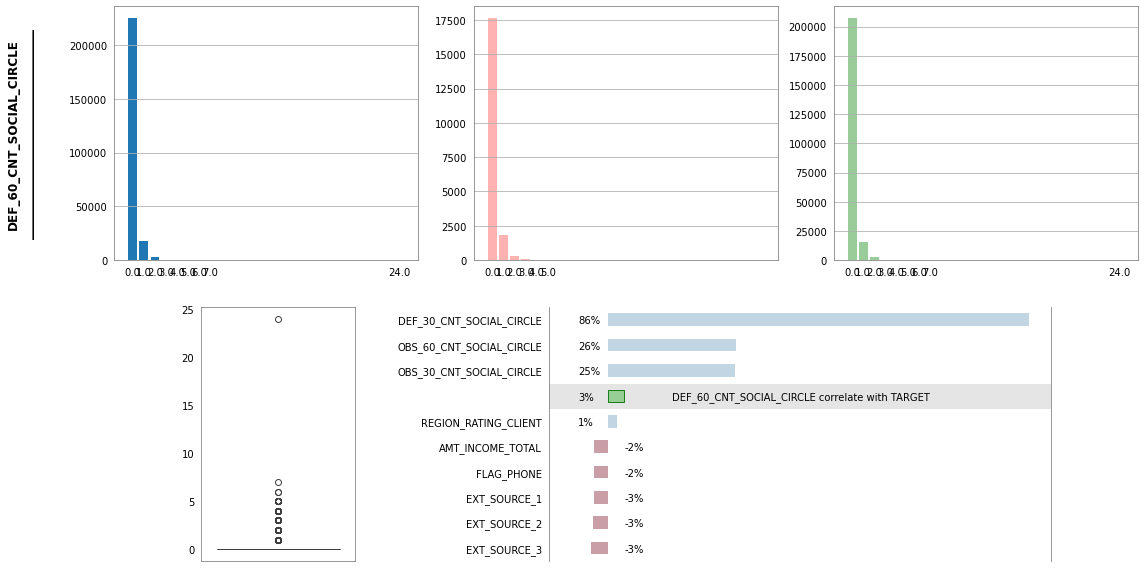

In [13]:
social = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
df[social] = df[social].astype('int',errors='ignore')
for col in social:
    num_visual(df,col)

+ Due to high correl between these feature, we chose to keep only DEF_60_CNT_SOSICAL_CIRCLE

# Enquiries frequence

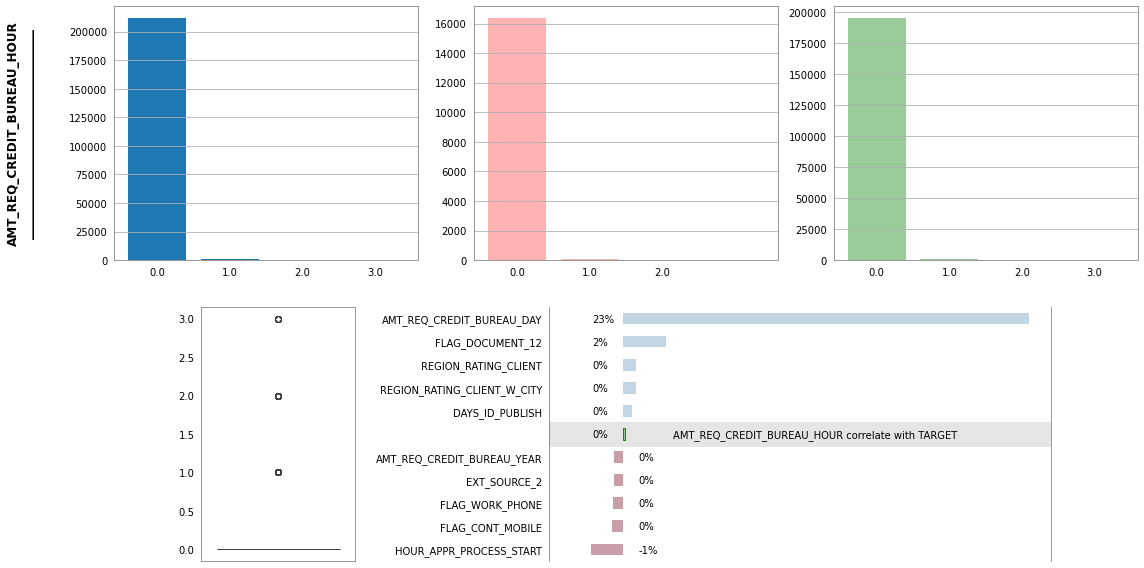

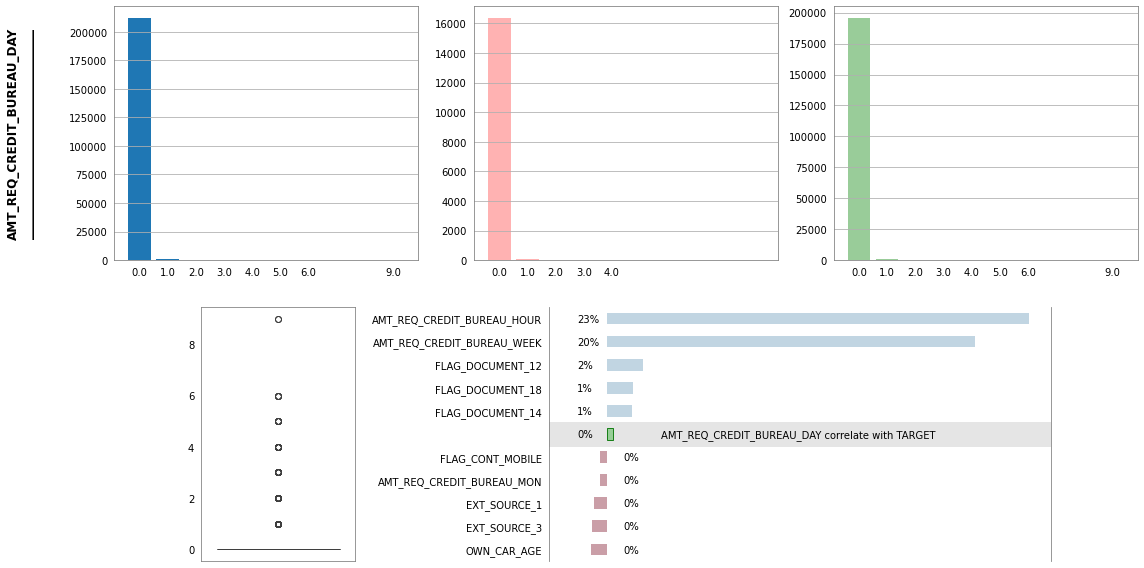

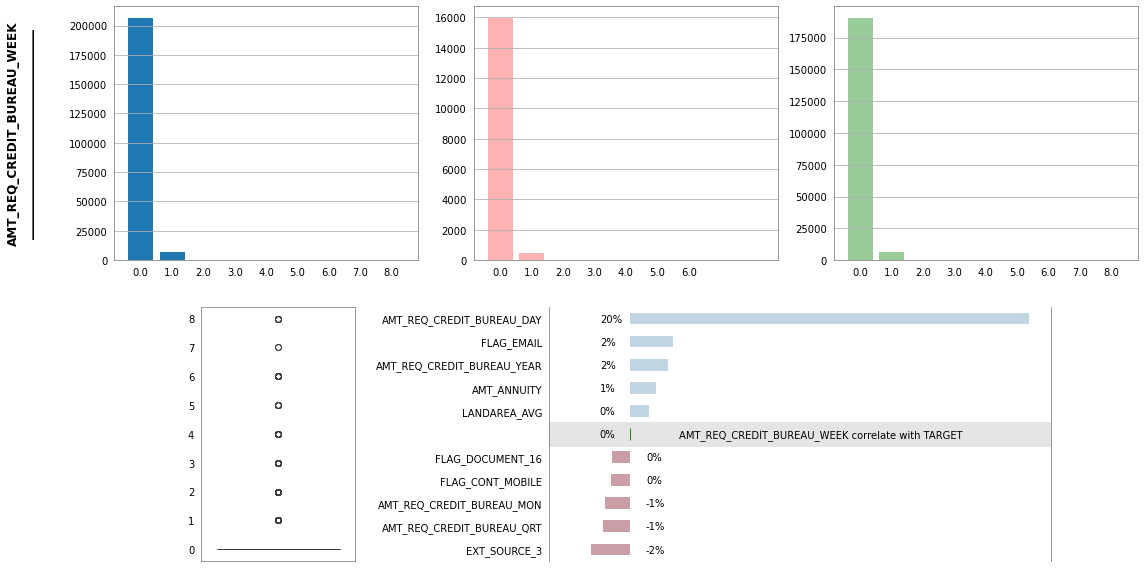

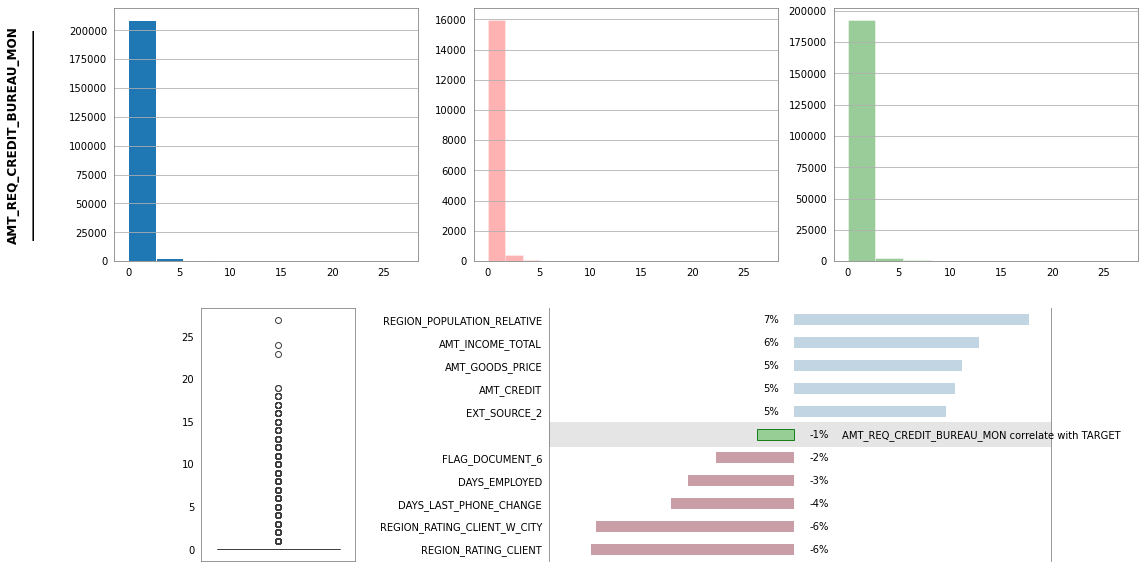

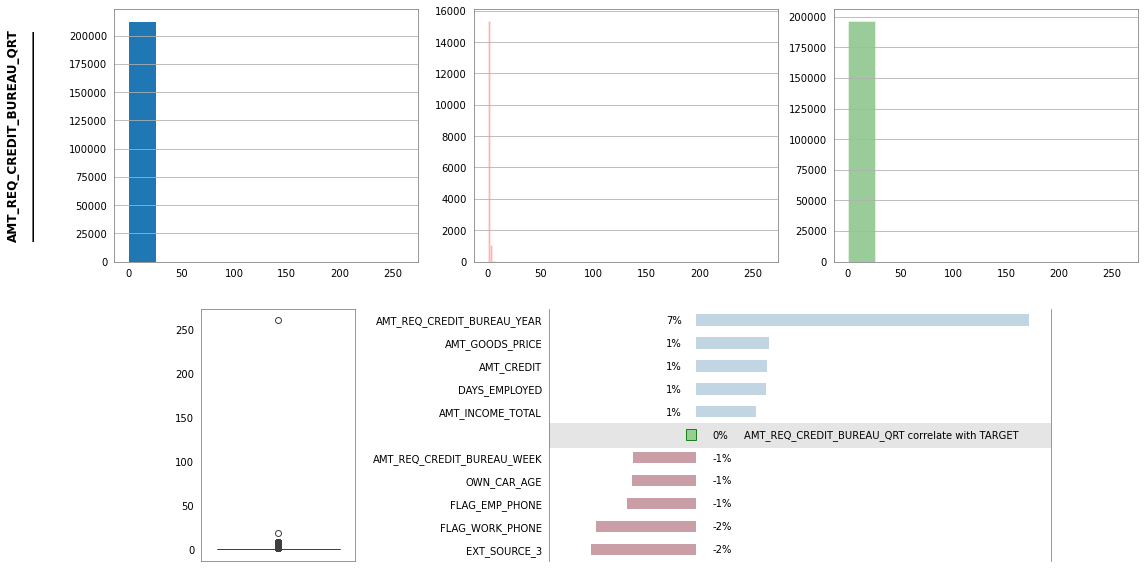

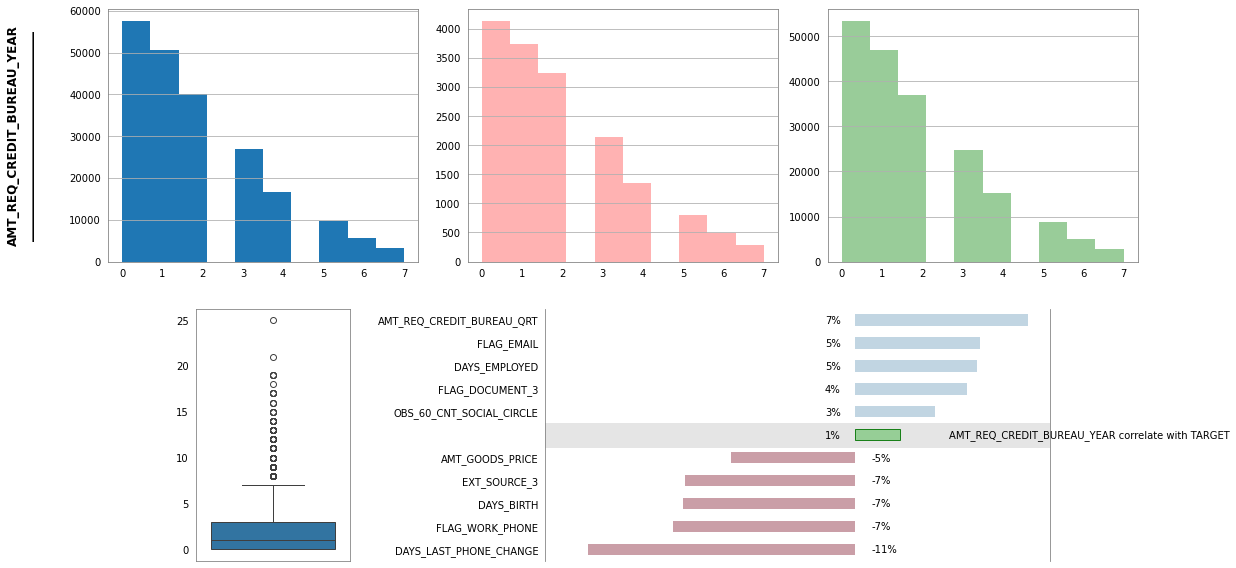

In [14]:
req = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for col in req:
    num_visual(df,col)

+ It seem that only AMT_..._(YEAR/MONTH) is meanning full here.

# External sources

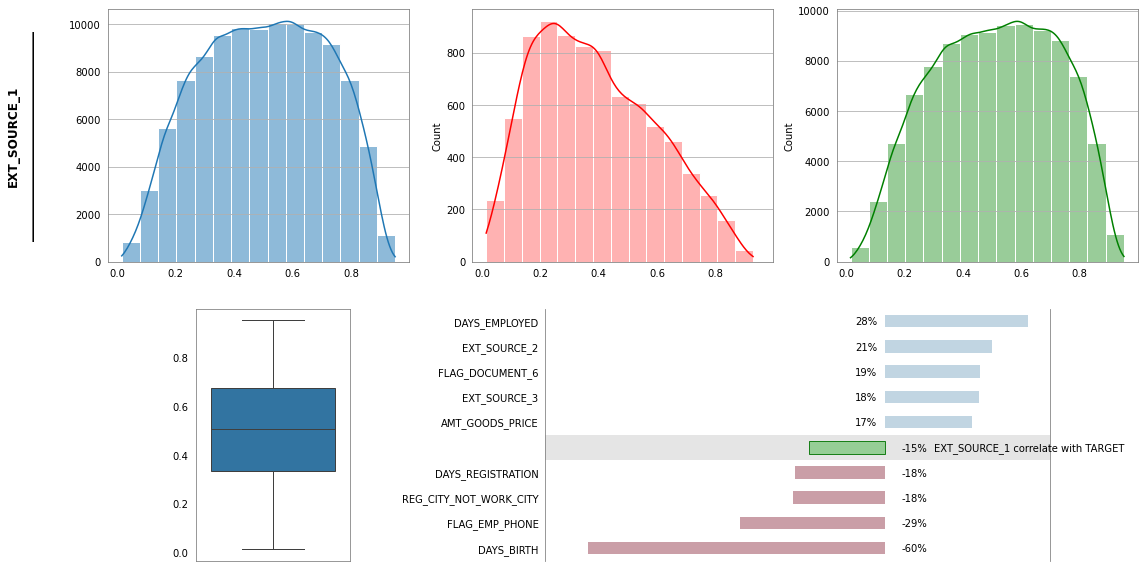

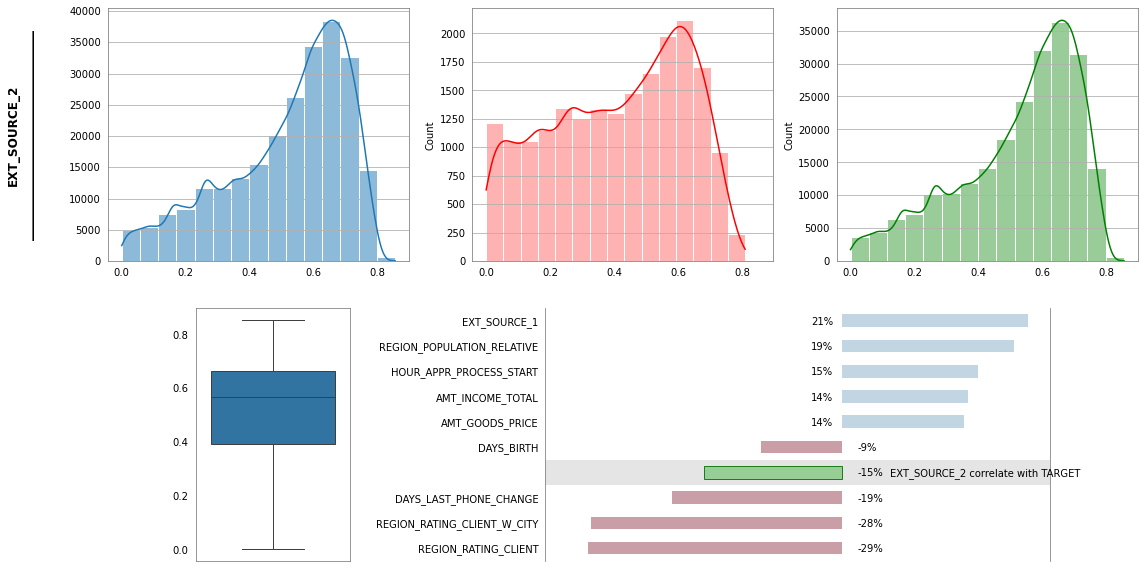

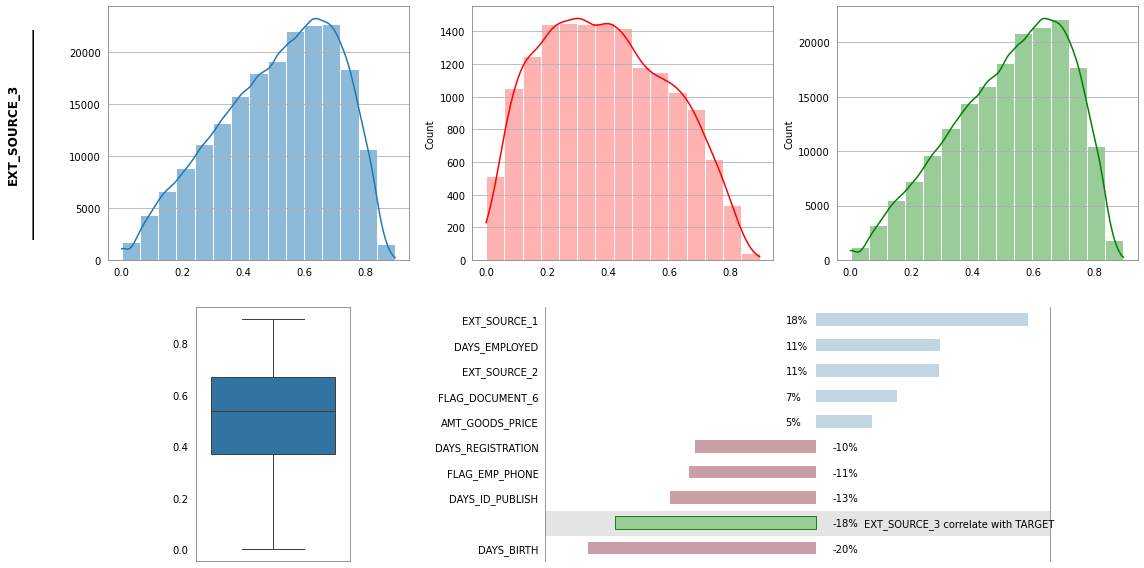

In [15]:
ext =['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for col in ext:
    num_visual(df,col,kde=True)

+ EXT_SOURCE_1 seem to highly relate DAYS_... feature, when EXT_SOURCE_2 is close to REGION feature.

+ EXT_SOURCE_3,EXT_SOURCE_2 is a good explainary variable here (been normalized) but EXT_SOURCE_3 have around 20% null values. It is over 50% null when it come to EXT_SOURCE_1.

# DAY TIMES

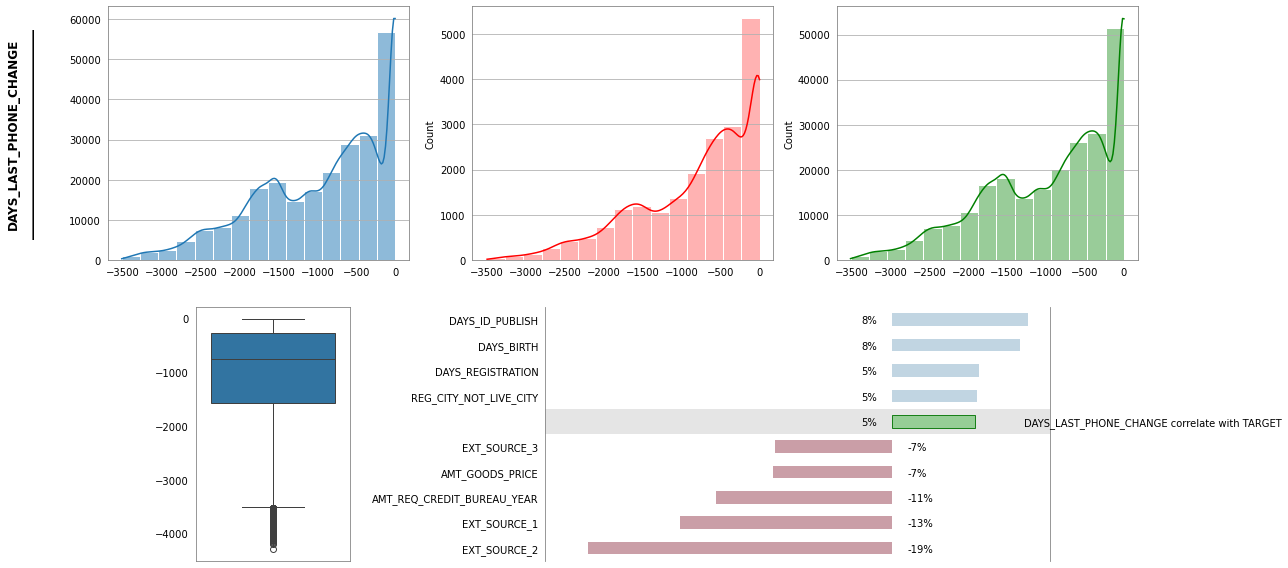

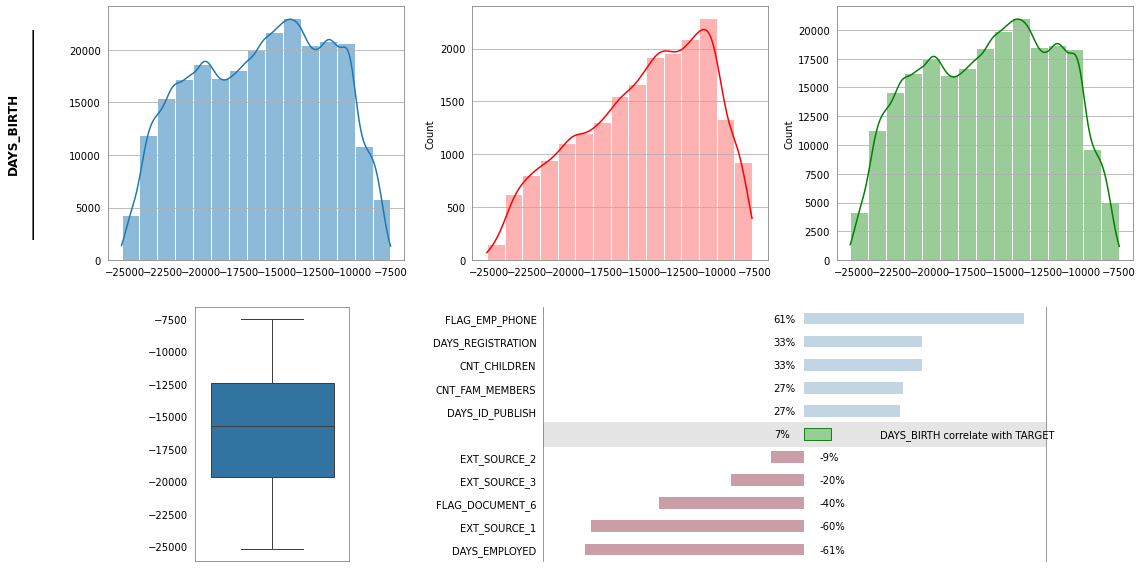

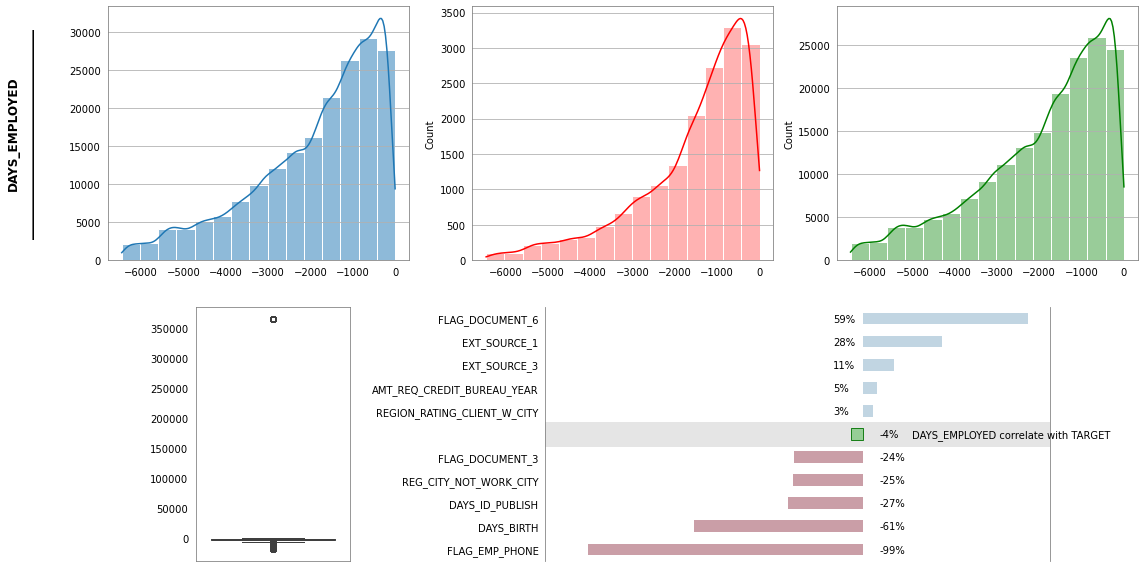

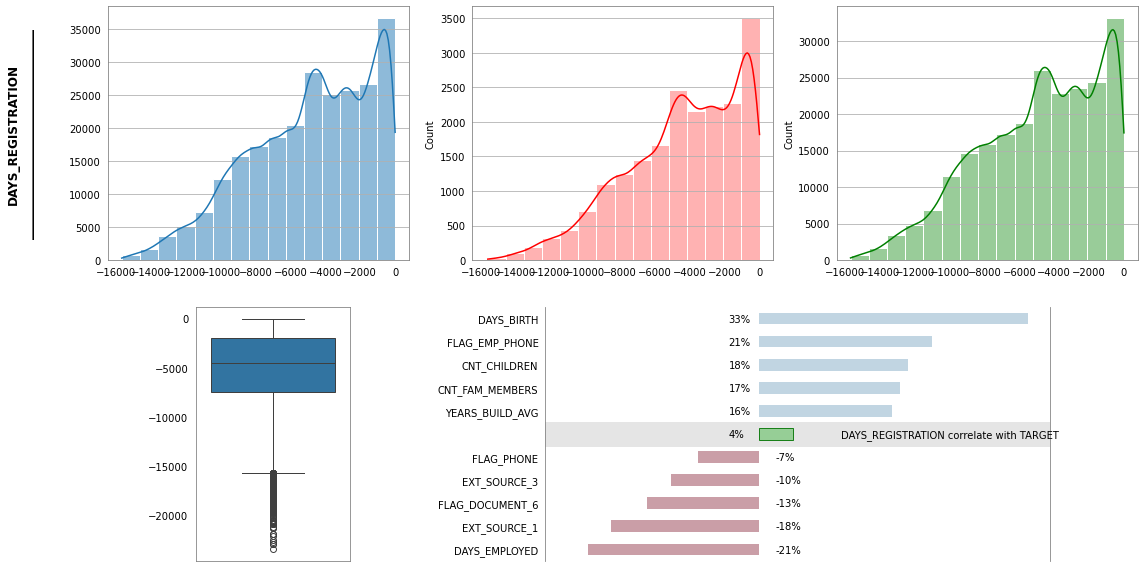

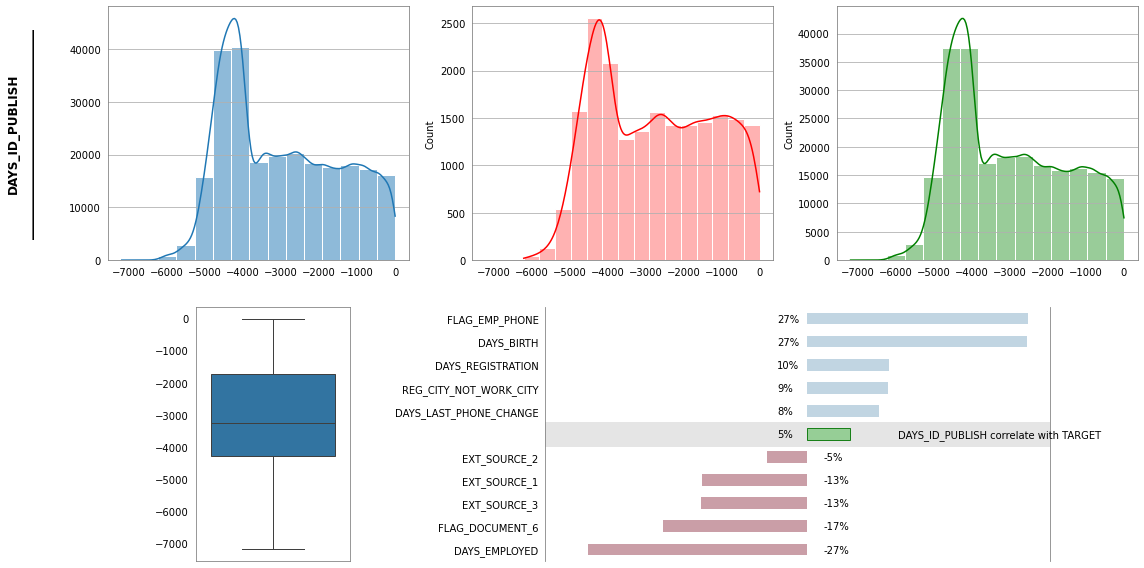

In [16]:
day = ['DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for col in day:
    num_visual(df,col,kde=True)

* Need more consideration into relationship between DAY_EMPLOYED ,DAYS_BIRTH and FLAG_EMP_PHONE, chose to drop DAY_EMPLOYED or FLAG_EMP_PHONE
* Other features are fine

# CONTACT


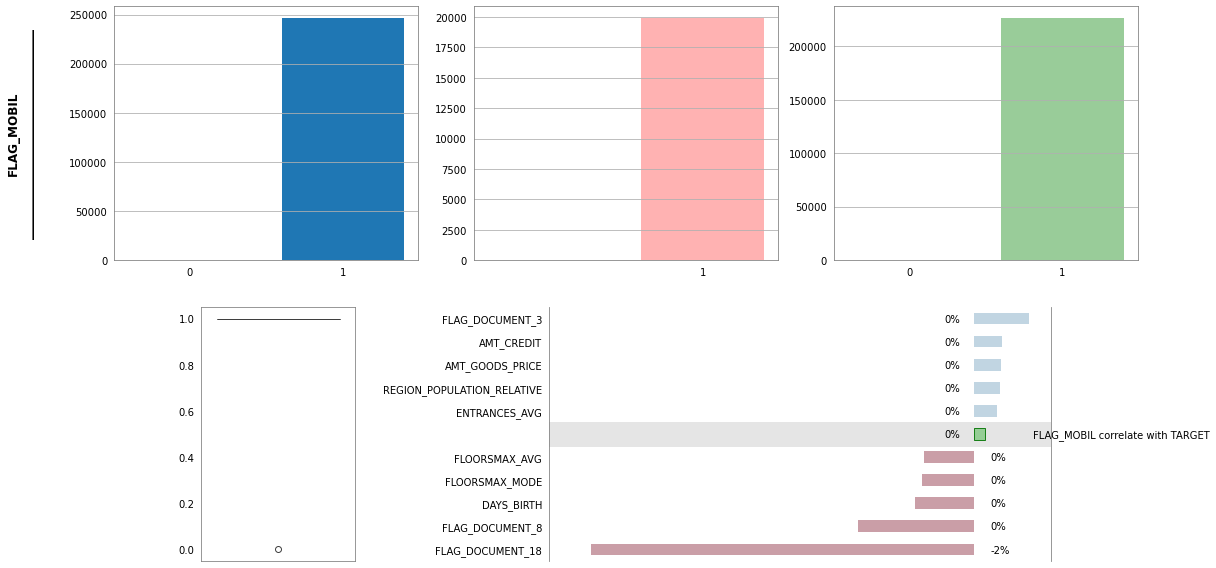

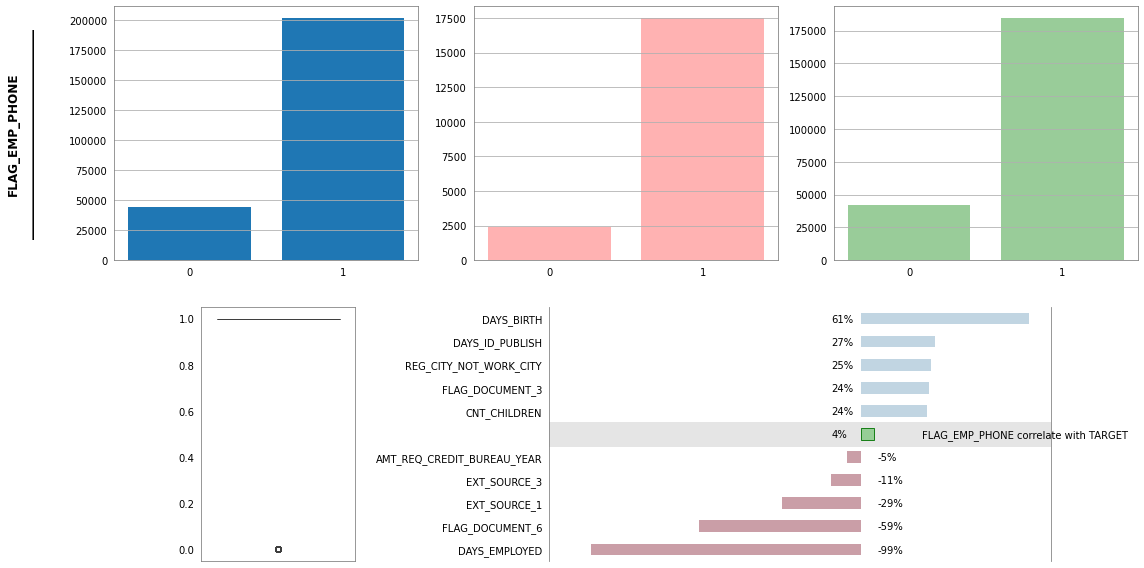

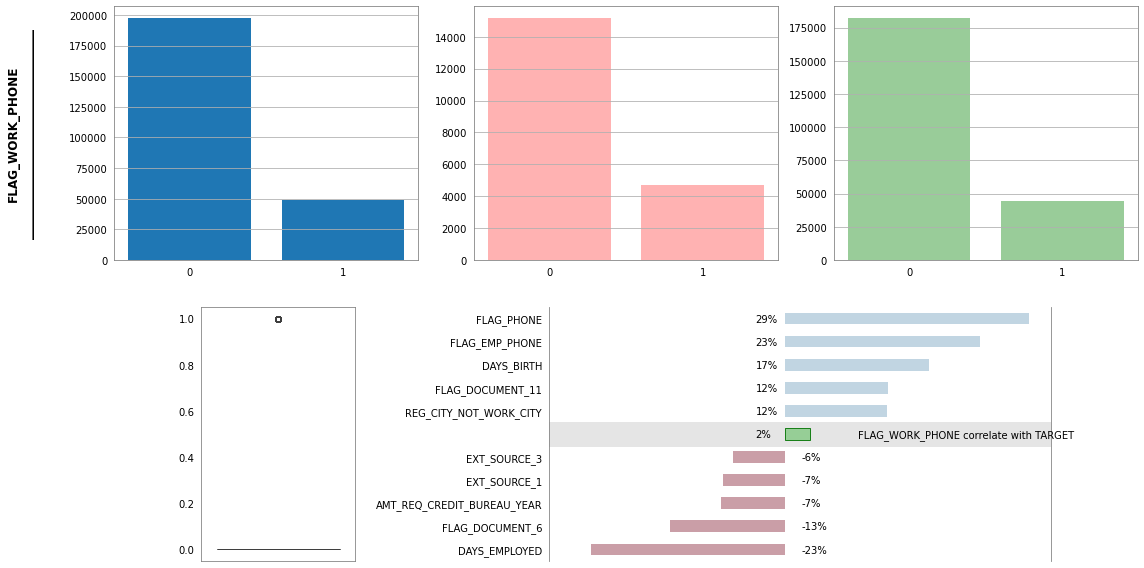

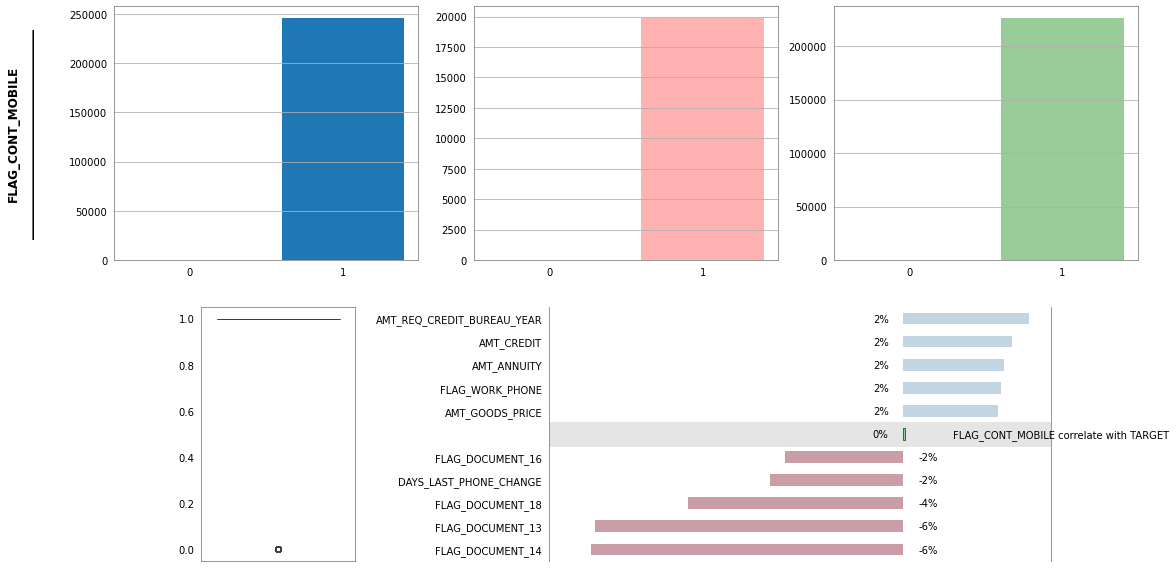

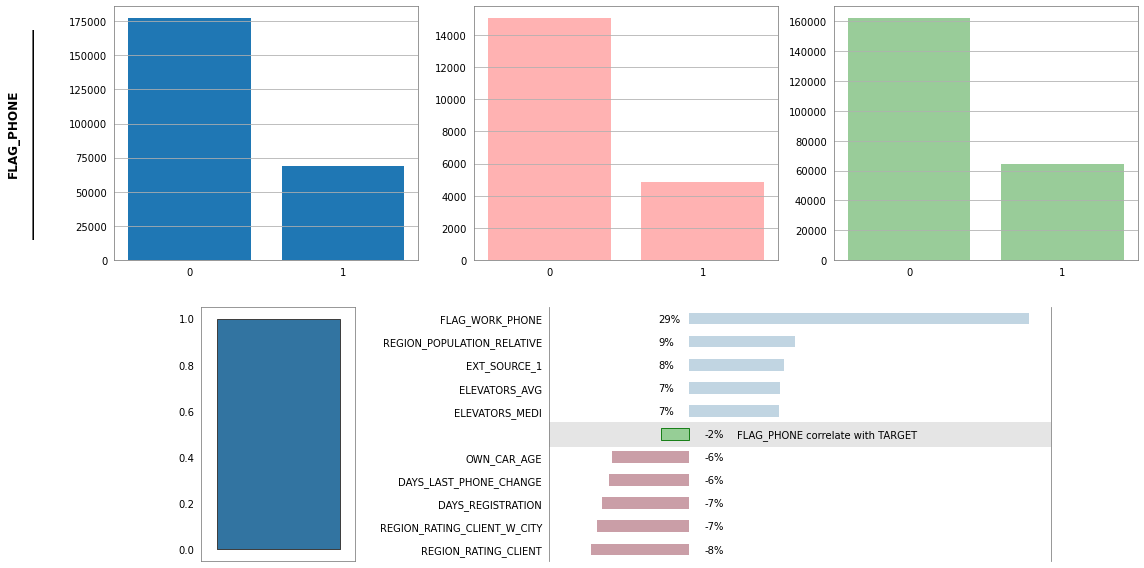

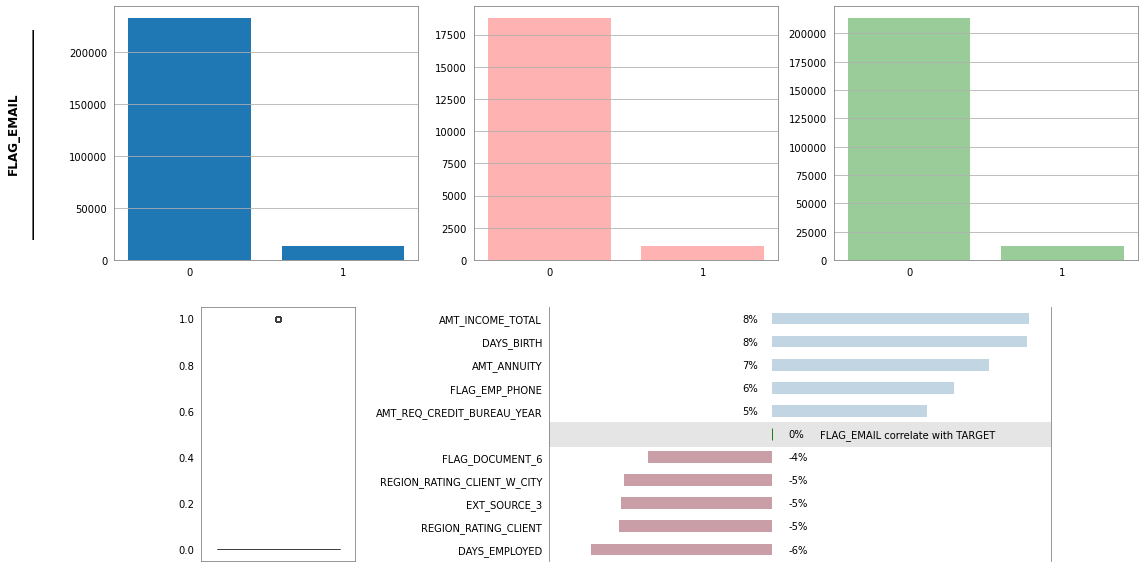

In [17]:
contact= ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
for col in contact:
    num_visual(df,col)

+ Feature can cause imbalance data: FLAG_MOBIL ,FLAG_CONT_MOBILE, FLAG_EMAIL

# REGION

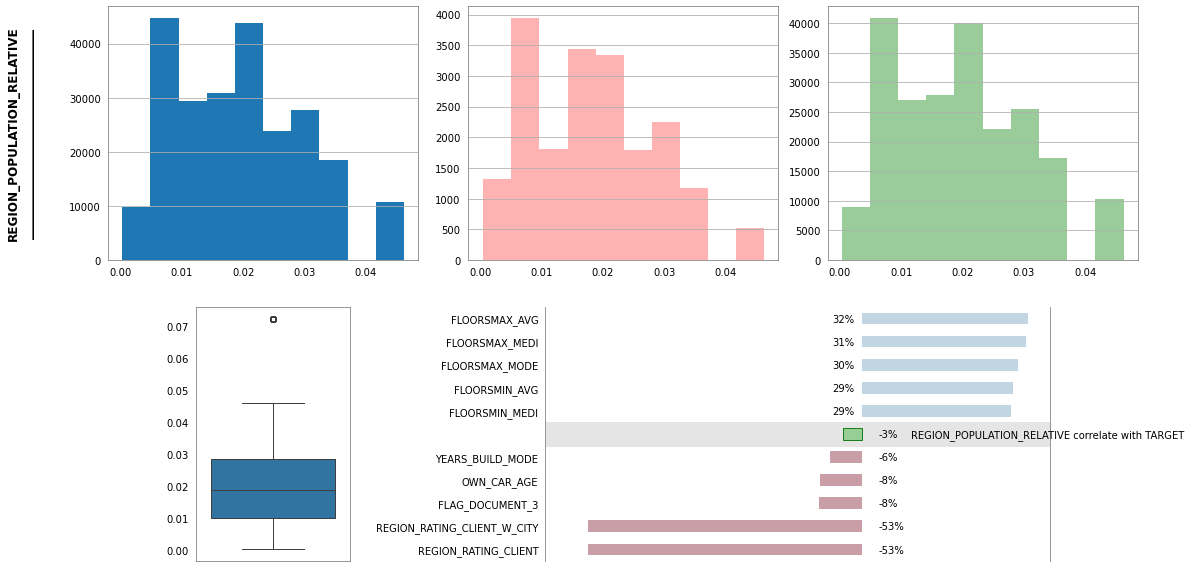

In [18]:
num_visual(df,'REGION_POPULATION_RELATIVE')

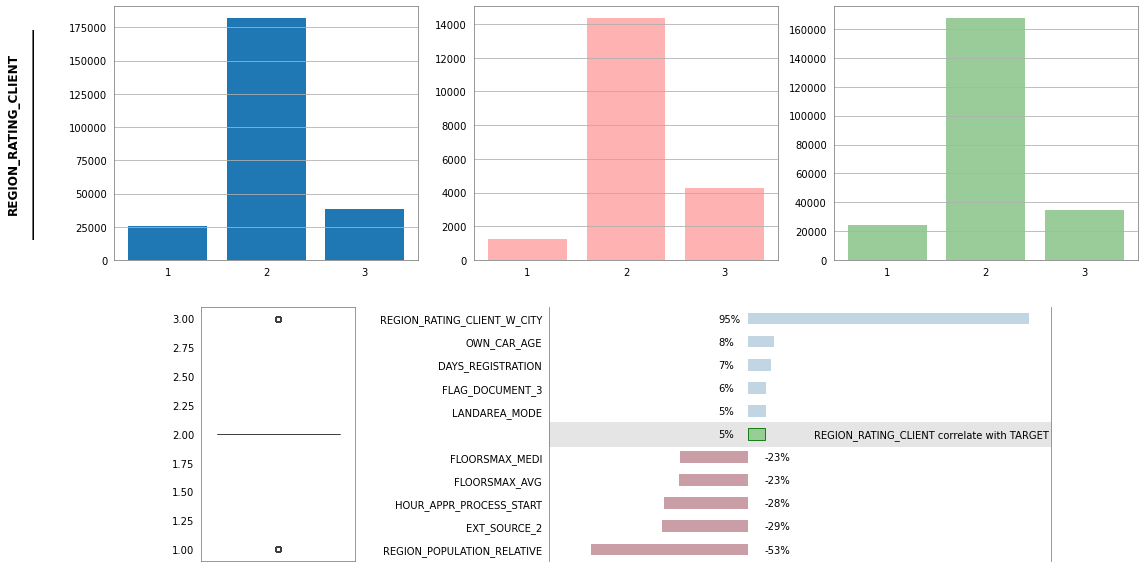

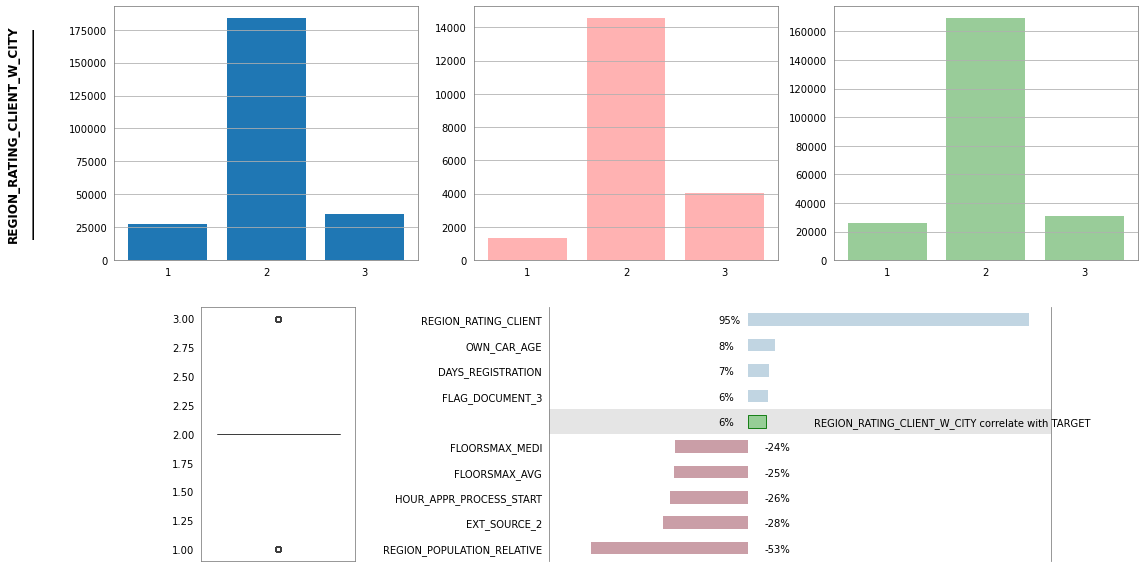

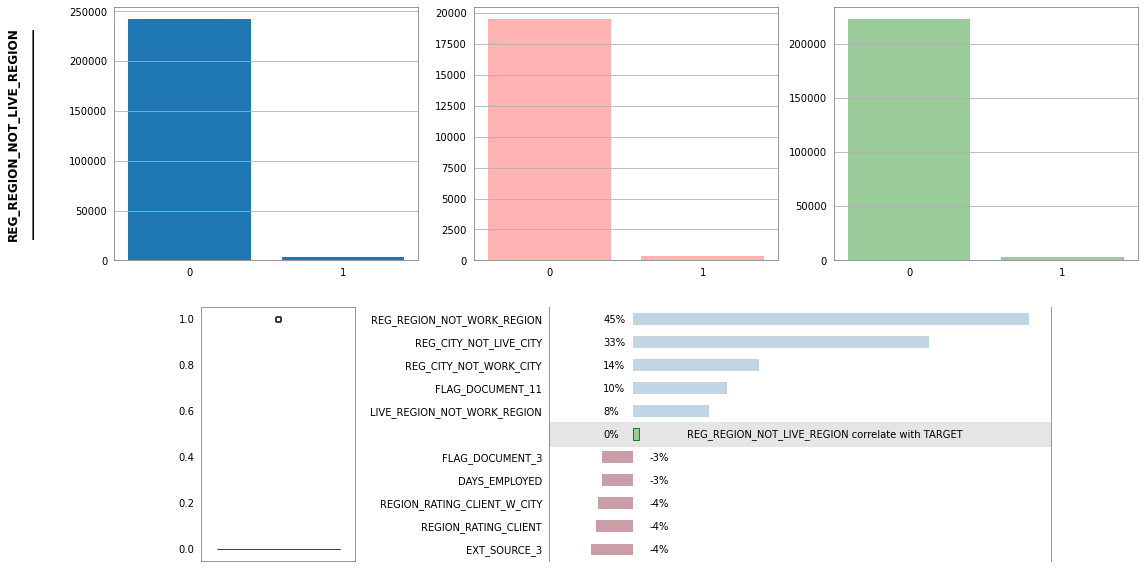

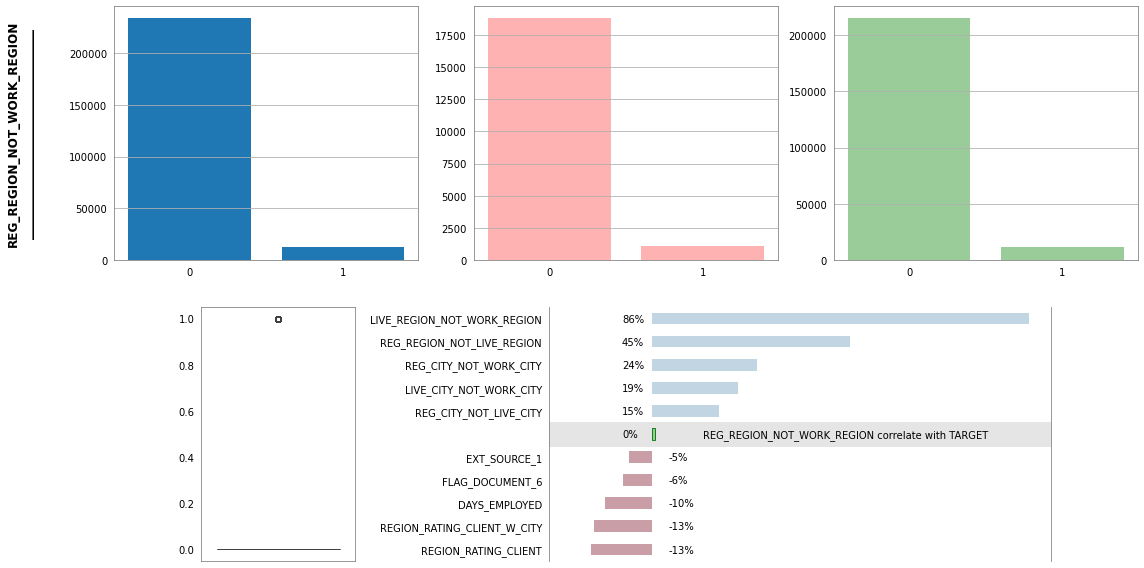

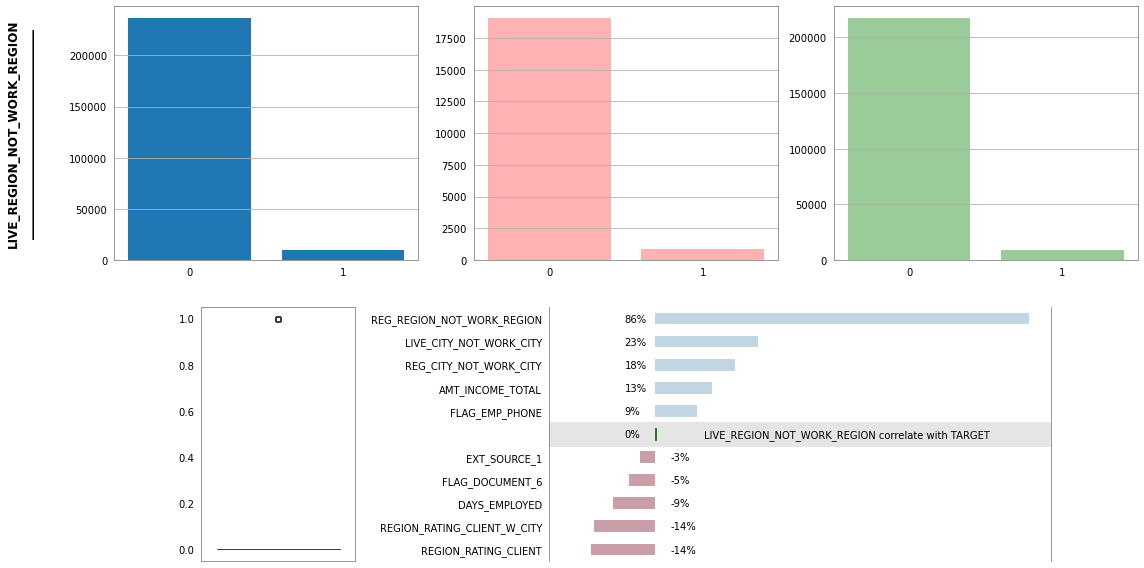

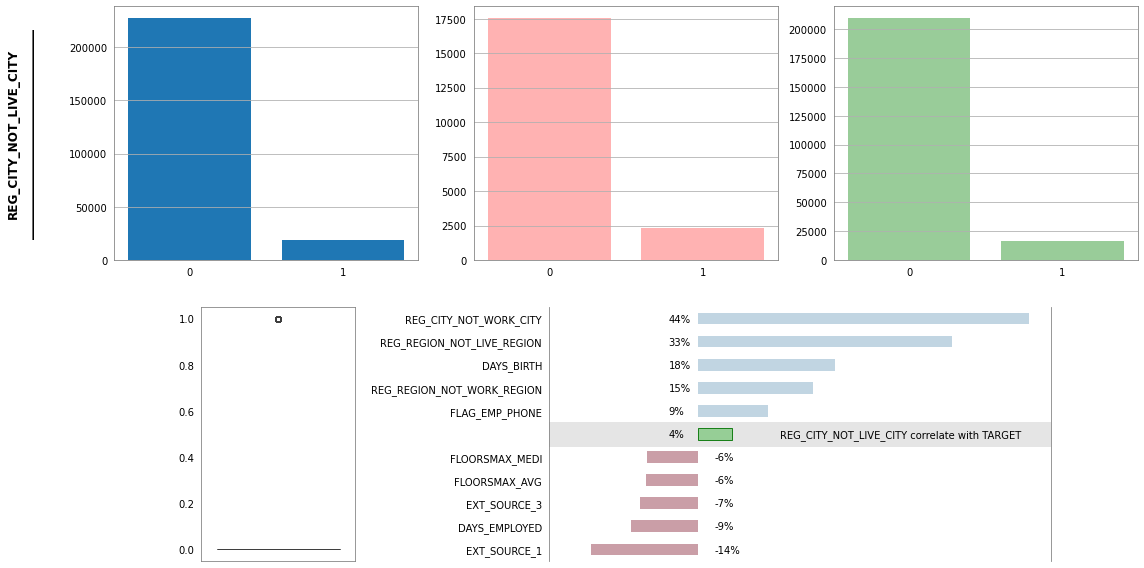

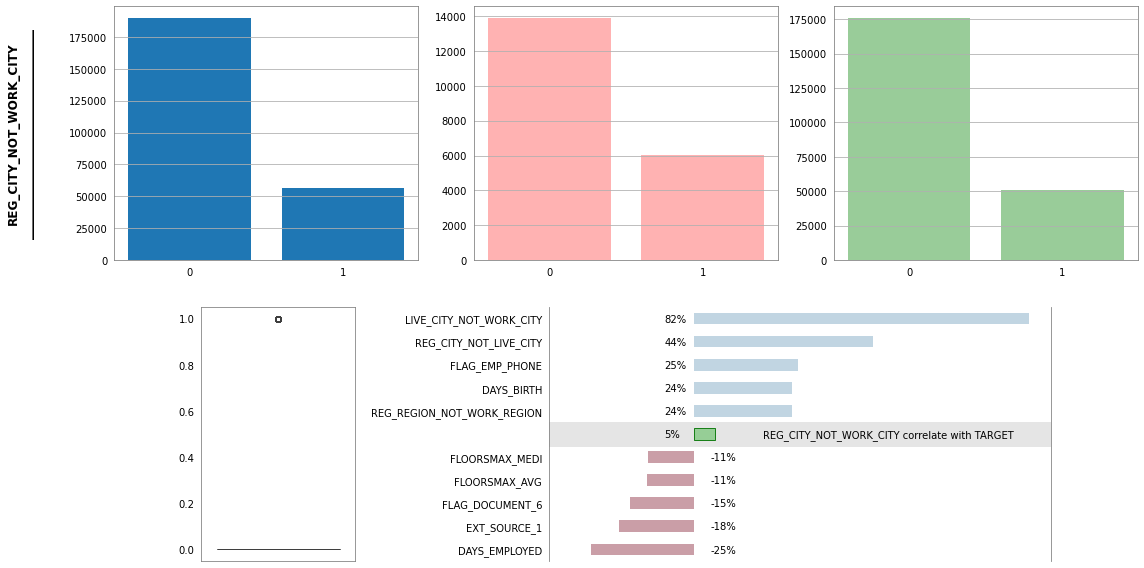

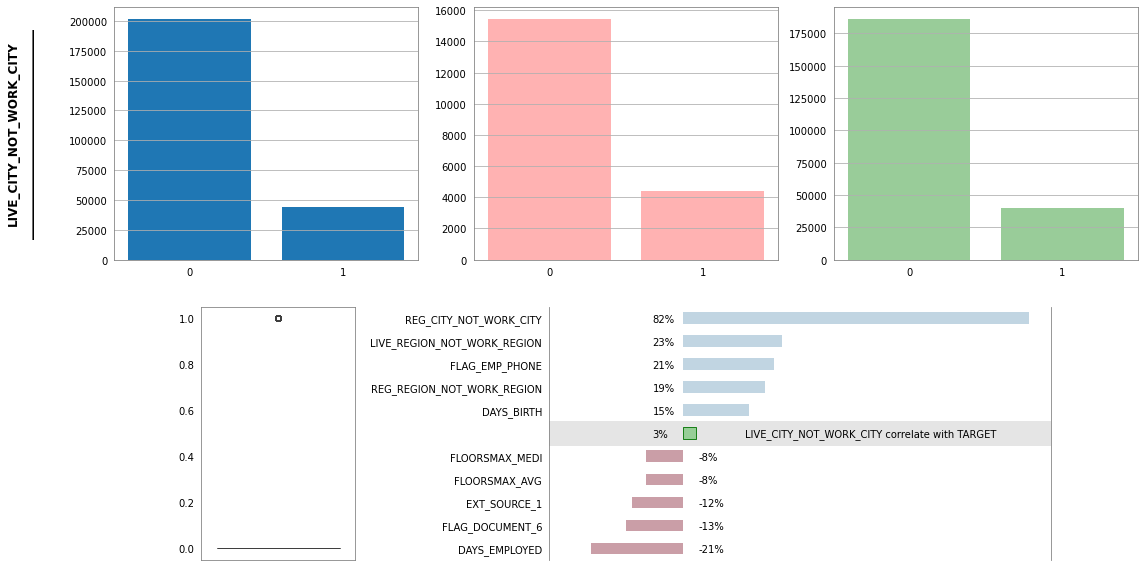

In [19]:
region = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',\
       'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
for col in region:
       num_visual(df,col)

+ Imbalance data: REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION'
+ High correlation
    + REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY, drop the first
    + REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY, drop the latter

# CATEGORICAL FEATURE

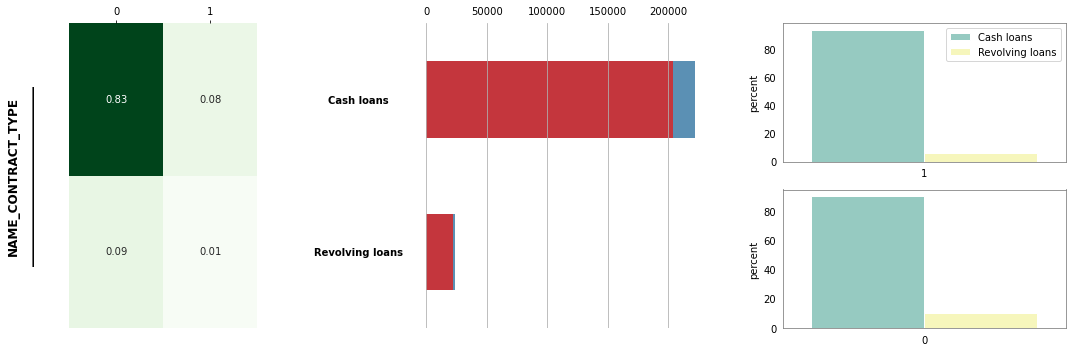

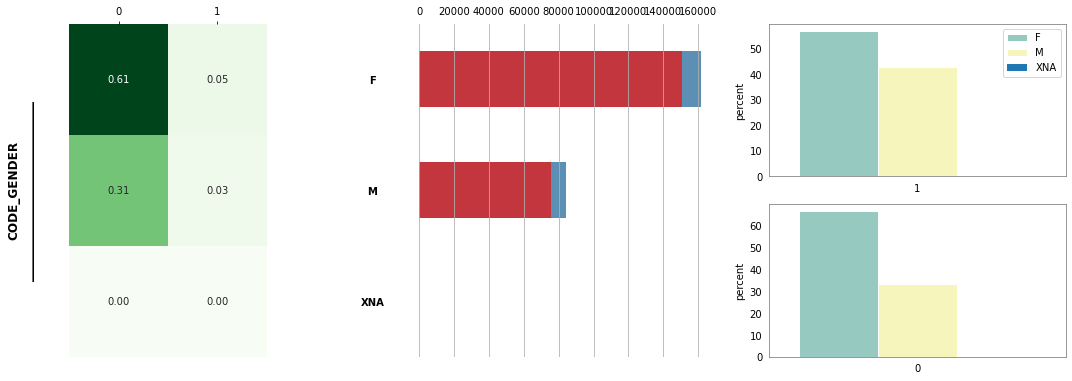

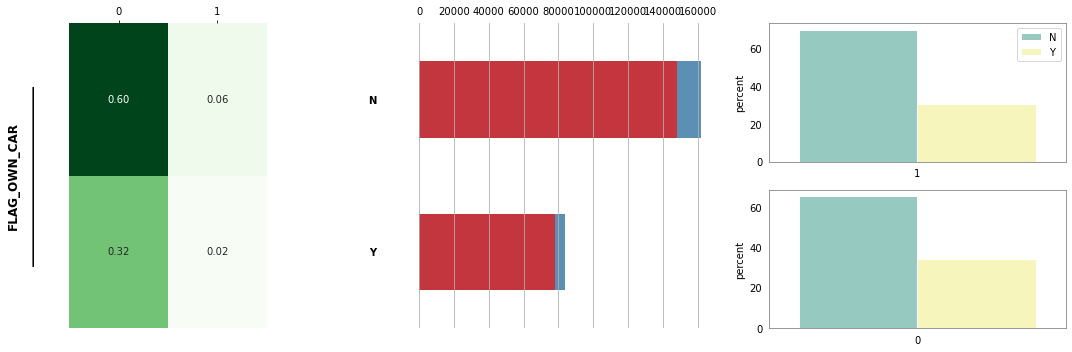

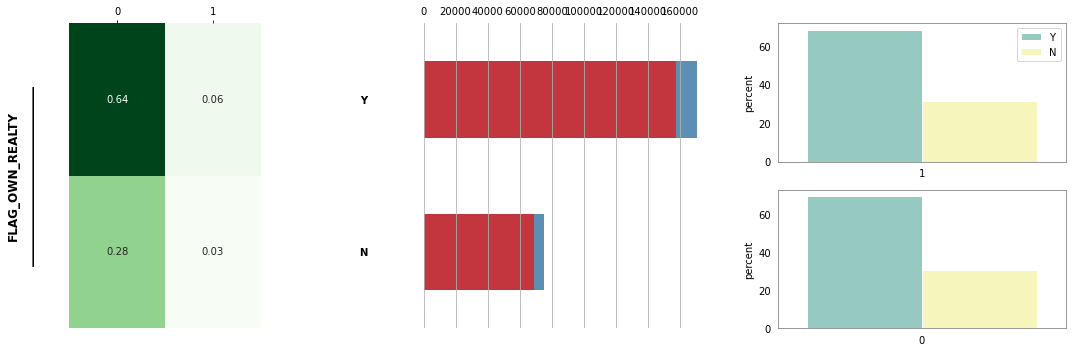

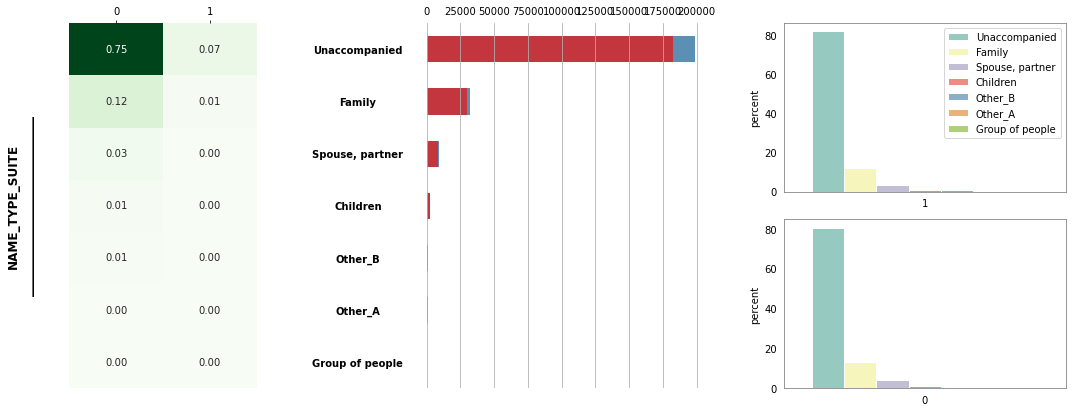

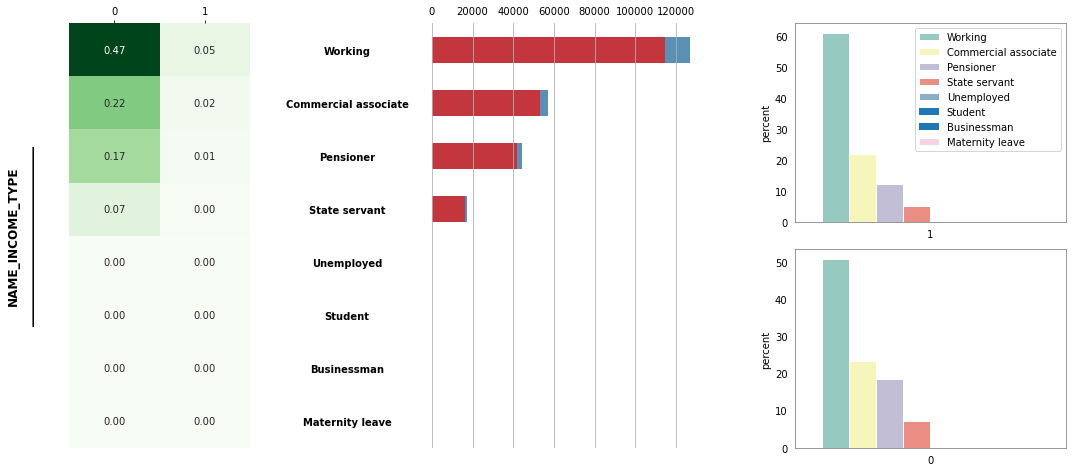

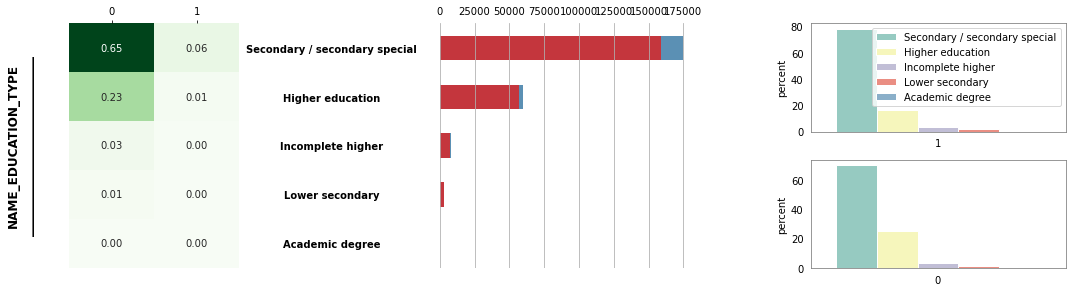

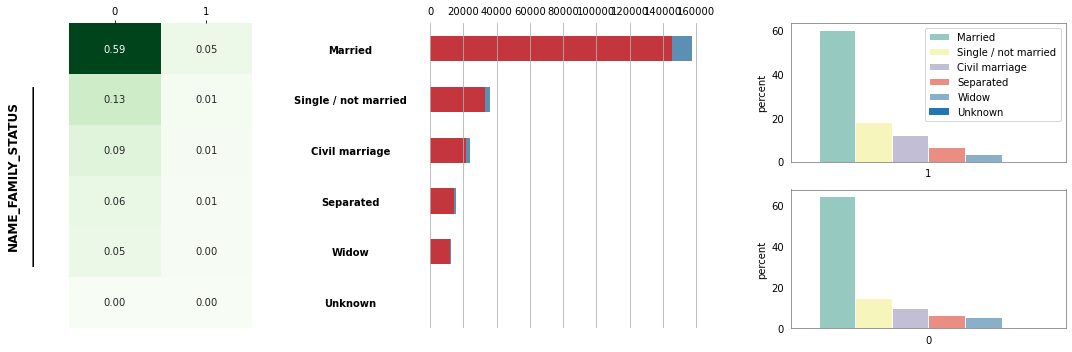

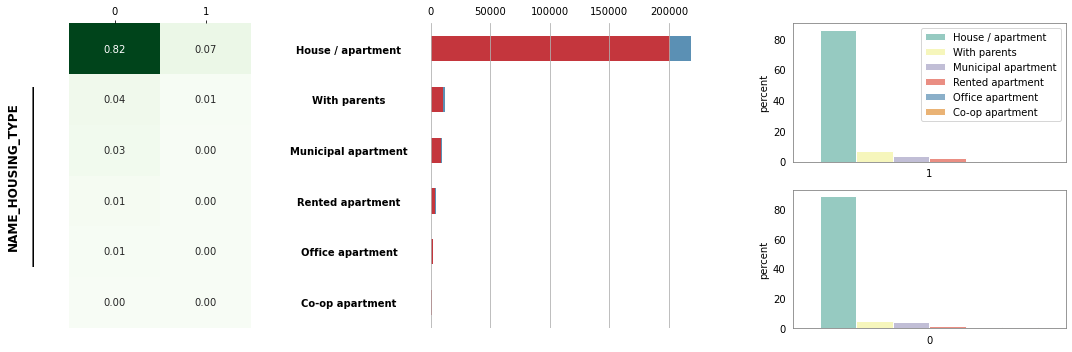

In [20]:
cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',\
        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',]
for i in cols:
    cat_visual(df,i)

In [21]:
# 'CODE_GENDER'         include strange values XNA,
# 'FLAG_OWN_CAR'        seem good
# 'FLAG_OWN_REALTY'     need more consideration
# 'NAME_TYPE_SUITE'     create group 'have Companion'
# 'NAME_INCOME_TYPE'    seem good, shoud group other less appear values
# 'NAME_EDUCATION_TYPE' keep, consider more
# 'NAME_FAMILY_STATUS'  may be good, handle unknow values

+ Imbalance data: 
    + NAME_CONTRACT_TYPE, NAME_HOUSING_TYPE

# PROCESS START

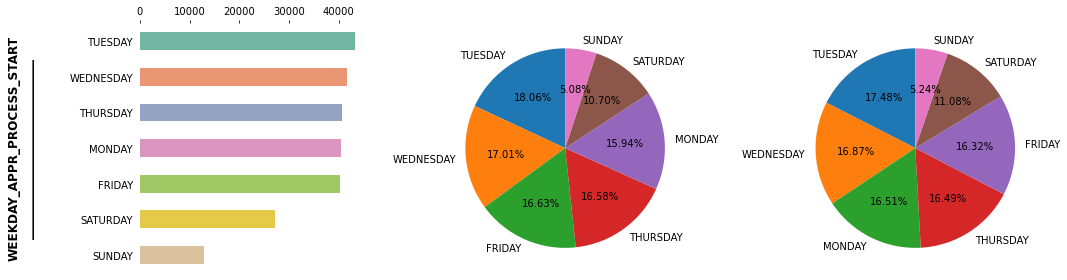

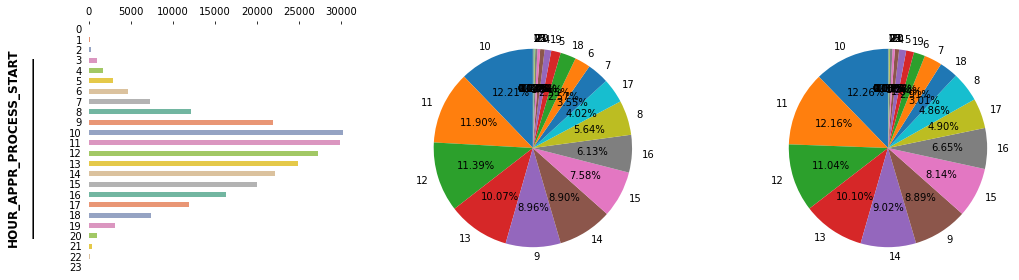

In [22]:
pro_start  = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'] #onehot
for col in pro_start:
    cat_visual2(df,col)

# FEATURE WITH MANY UNIQUE VALUES

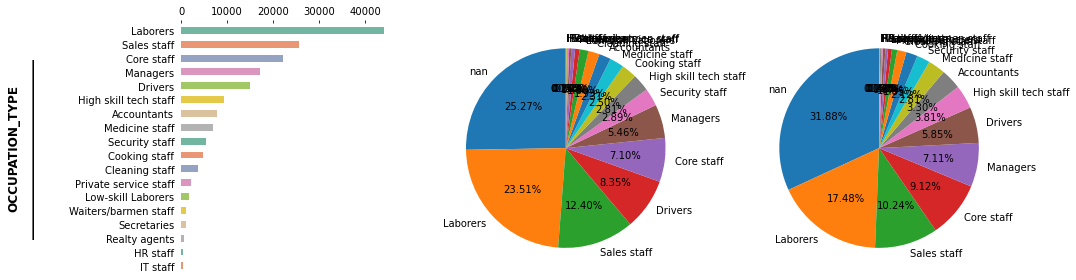

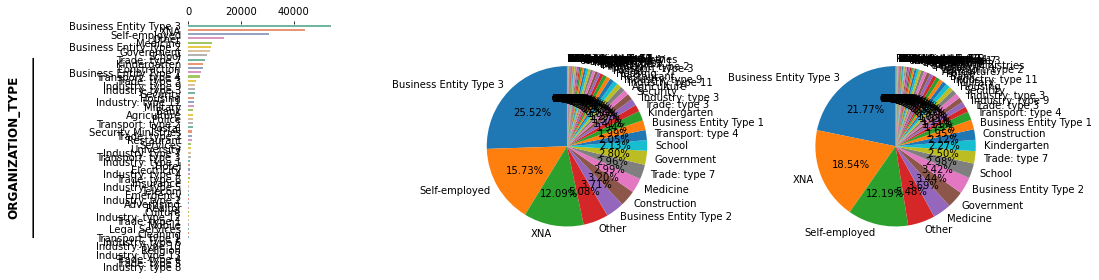

In [23]:
many_cate = ['OCCUPATION_TYPE','ORGANIZATION_TYPE']
for col in many_cate:
    cat_visual2(df,col)

# FINANCIAL CONDITION

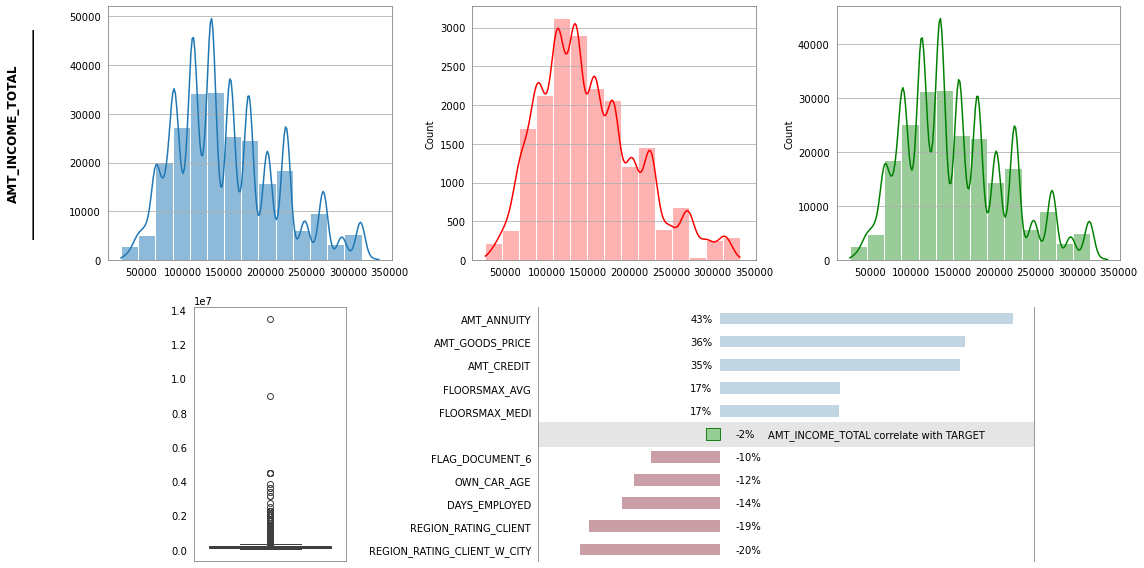

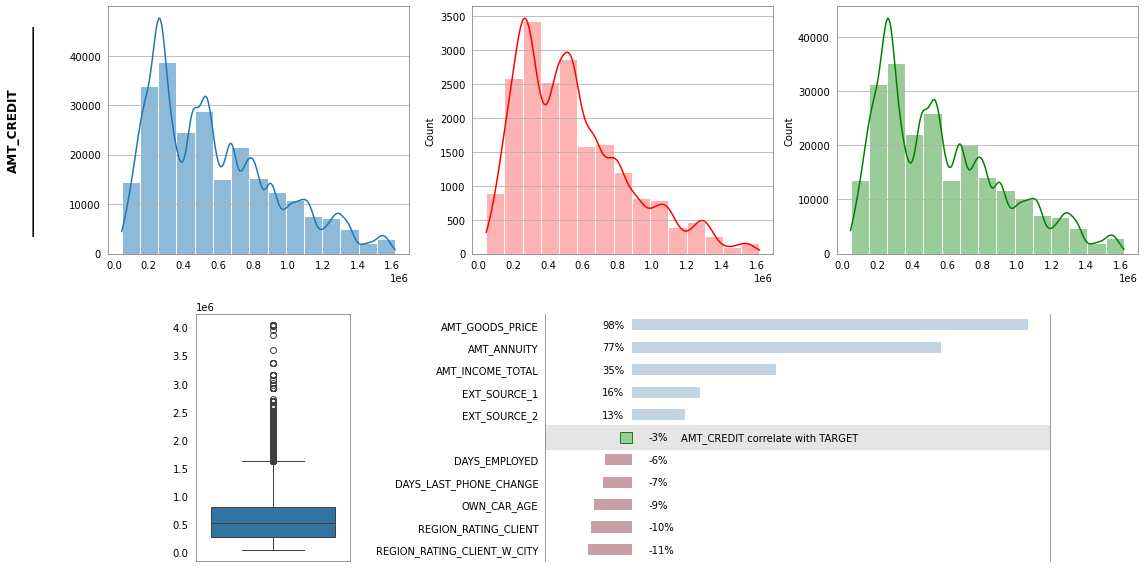

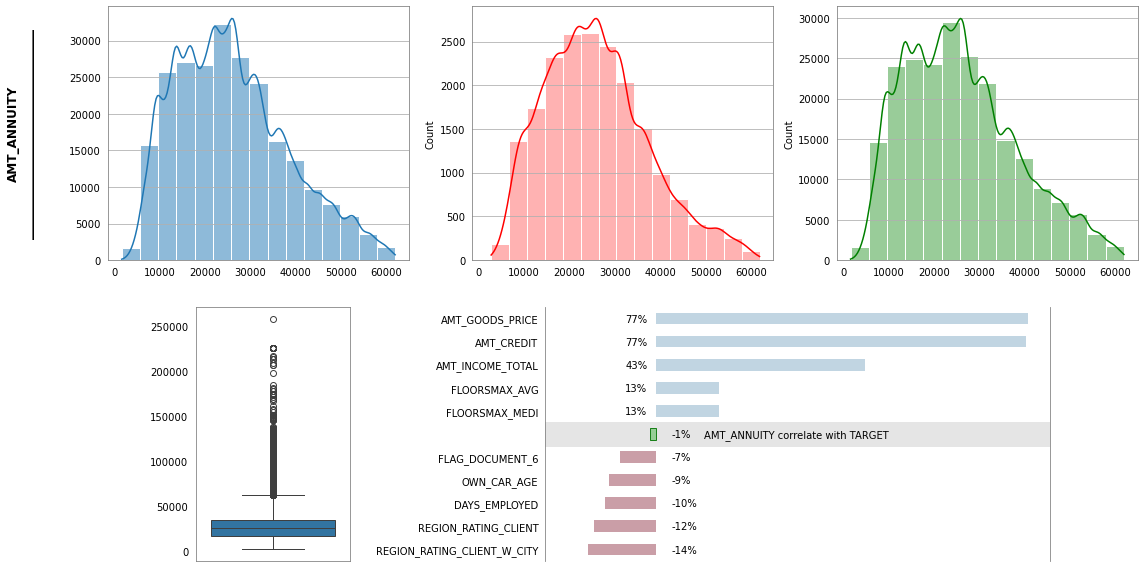

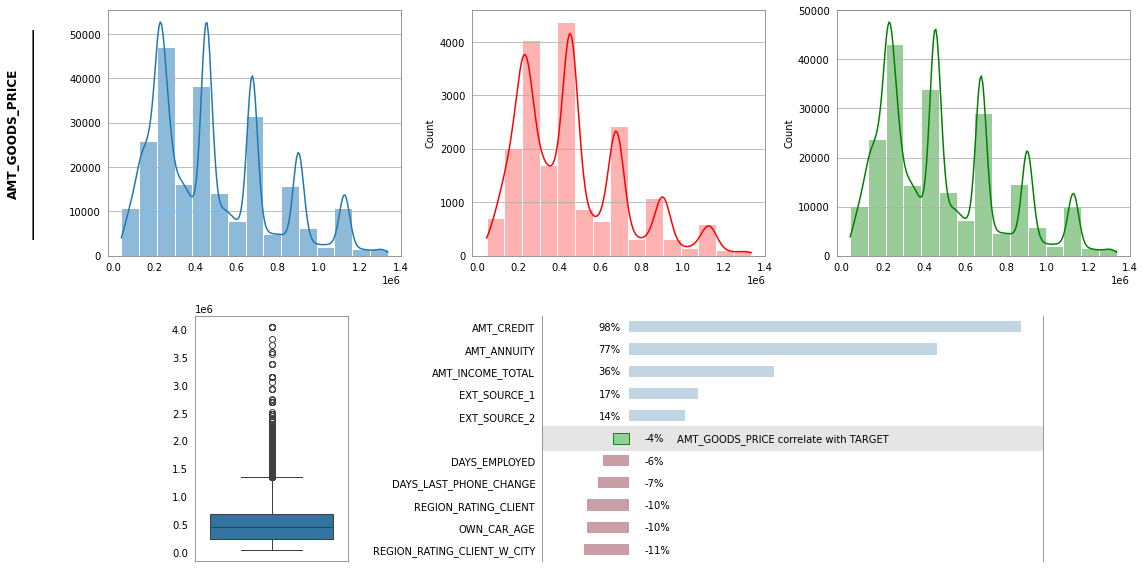

In [24]:
fin = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for col in fin:
    num_visual(df,col,kde = True)

+ High correlation:
    + AMT_CREDIT and AMT_GOOD_PRICE, AMT_ANNUITY

# FAMILY

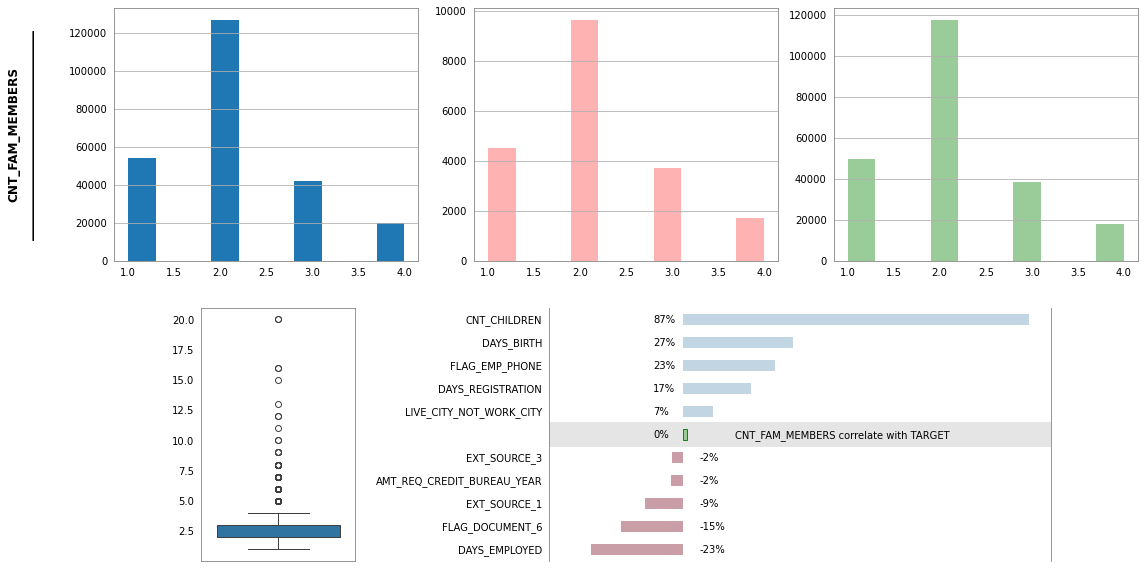

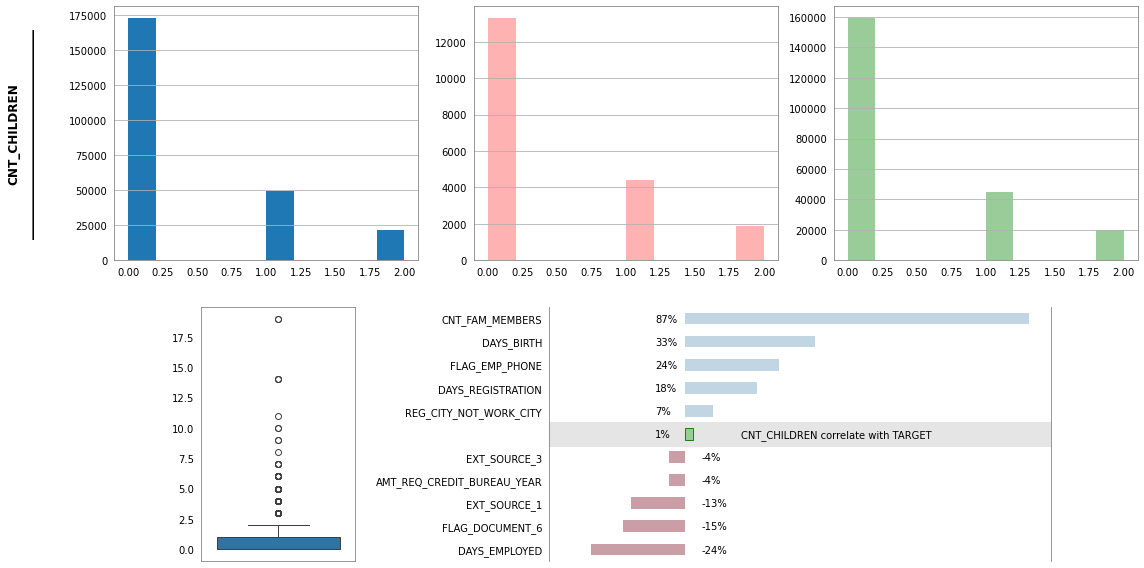

In [25]:
fam = ['CNT_FAM_MEMBERS','CNT_CHILDREN'] # astype('int)
for col in fam:
    num_visual(df,col)